In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/')

#Chargement data set

In [4]:
data = pd.read_csv('P4_data_clean.csv')
data=data.drop('Unnamed: 0',axis=1)

In [5]:
data.shape

(6648, 22)

In [ ]:
data.head()

,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,PropertyGFATotal,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,Latitude,Longitude,log_SiteEnergyUseWN(kBtu),log_TotalGHGEmissions
0,12.0,0.0,88434.0,88434.0,5238.0,7729.6,65.0,1,2015,NonResidential,Hotel,7,DOWNTOWN,1927,88434,Hotel,0,0,47.612190,-122.337997,15.775259,5.523179
1,11.0,15064.0,88502.0,83880.0,15064.0,4622.0,51.0,2,2015,NonResidential,Hotel,7,DOWNTOWN,1996,103566,Hotel,Parking,Restaurant,47.613106,-122.333358,15.986367,5.577879
2,10.0,0.0,61320.0,61320.0,59433.8,22284.6,1.0,5,2015,NonResidential,Hotel,7,DOWNTOWN,1926,61320,Hotel,0,0,47.614216,-122.336609,17.160612,7.569071
3,18.0,12460.0,107430.0,123445.0,68009.0,0.0,67.0,8,2015,NonResidential,Hotel,7,DOWNTOWN,1980,119890,Hotel,Parking,Swimming Pool,47.613754,-122.340924,16.528763,6.231858
4,2.0,37198.0,60090.0,88830.0,6564.2,15090.8,21.6,9,2015,Nonresidential COS,Other,7,DOWNTOWN,1999,97288,Police Station,0,0,47.616439,-122.336764,16.383935,5.722343


##Catégorisation


In [ ]:
property_types_indic= ['SecondLargestPropertyUseType','LargestPropertyUseType','ThirdLargestPropertyUseType','PrimaryPropertyType']

SecondLargestPropertyUseType
nb de catégorie: 51


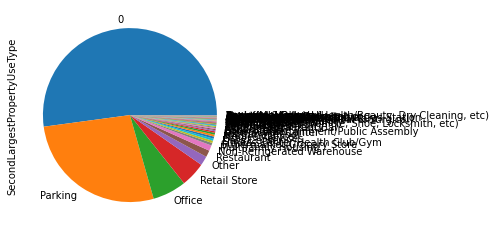

----------------------------------------
LargestPropertyUseType
nb de catégorie: 57


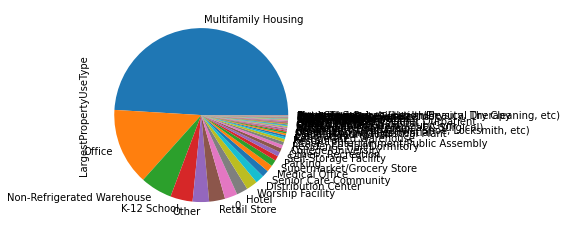

----------------------------------------
ThirdLargestPropertyUseType
nb de catégorie: 46


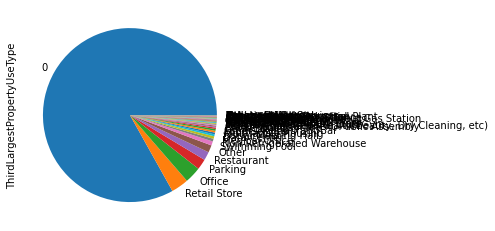

----------------------------------------
PrimaryPropertyType
nb de catégorie: 29


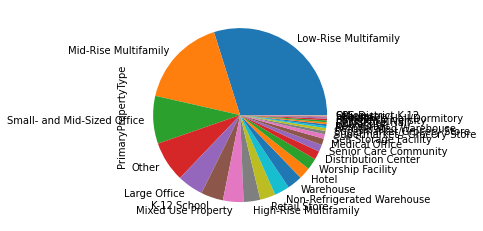

----------------------------------------


In [ ]:
for i in property_types_indic:
  print(i)
  print('nb de catégorie:',data[i].nunique())
  data[i].value_counts().plot.pie()
  plt.show()
  print('-'*40)

In [ ]:
for i in property_types_indic:
  print(i)
  print(data[i].unique())
  print('-'*40)

SecondLargestPropertyUseType
['0' 'Parking' 'Office' 'Restaurant' 'K-12 School'
 'Non-Refrigerated Warehouse' 'Other - Education' 'Vocational School'
 'Retail Store' 'Other - Entertainment/Public Assembly' 'Data Center'
 'Swimming Pool' 'Other' 'Courthouse' 'Residence Hall/Dormitory'
 'Distribution Center' 'Self-Storage Facility' 'Other - Services'
 'Laboratory' 'Movie Theater' 'Supermarket/Grocery Store' 'Medical Office'
 'Other - Recreation' 'Convenience Store without Gas Station'
 'Fitness Center/Health Club/Gym' 'Performing Arts' 'College/University'
 'Other - Restaurant/Bar' 'Adult Education' 'Multifamily Housing'
 'Bar/Nightclub' 'Financial Office'
 'Repair Services (Vehicle, Shoe, Locksmith, etc)'
 'Other - Lodging/Residential' 'Bank Branch' 'Food Service'
 'Worship Facility' 'Senior Care Community' 'Refrigerated Warehouse'
 'Hotel' 'Food Sales' 'Other/Specialty Hospital' 'Other - Public Services'
 'Manufacturing/Industrial Plant' 'Social/Meeting Hall' 'Museum'
 'Hospital (Gener

In [ ]:
property_types_dict = {
    
                'Multifamily Housing' : 'Hotel',
                'Other - Lodging/Residential': 'Hotel',
                'Residence Hall/Dormitory': 'Hotel',
                'Residence Hall': 'Hotel',
                'Hotel' : 'Hotel',
                'Senior Care Community' : 'Hotel',
                'Residential Care Facility' : 'Hotel',
                'High-Rise Multifamily': 'Hotel',
                'Low-Rise Multifamily': 'Hotel',
                'Mid-Rise Multifamily': 'Hotel',
                'Mixed Use Property': 'Hotel',
    
                'Retail Store' : 'Shop',
                'Supermarket/Grocery Store' : 'Shop',
                'Repair Services (Vehicle, Shoe, Locksmith, etc)' : 'Shop',
                'Automobile Dealership': 'Shop',
                'Convenience Store without Gas Station': 'Shop',
                'Personal Services': 'Shop',
                'Enclosed Mall': 'Shop',
                'Strip Mall': 'Shop',
                'Wholesale Club/Supercenter': 'Shop',
                'Other - Mall': 'Shop',
                'Supermarket / Grocery Stor': 'Shop',
                'Distribution Center': 'Shop',
                'Supermarket / Grocery Store': 'Shop',
                
                'Food Sales': 'Activity',
                'Restaurant' : 'Activity',
                'Other - Restaurant/Bar' : 'Activity',
                'Food Service': 'Activity' ,
                'Worship Facility': 'Activity',
                'Other - Recreation': 'Activity',
                'Other - Entertainment/Public Assembly': 'Activity',
                'Performing Arts': 'Activity',
                'Bar/Nightclub': 'Activity',
                'Movie Theater': 'Activity',
                'Museum': 'Activity',
                'Social/Meeting Hall': 'Activity',
                'Fitness Center/Health Club/Gym': 'Activity',
                'Lifestyle Center ': 'Activity',
                'Fast Food Restaurant': 'Activity',
                'Swimming Pool': 'Activity',
                'Personal Services (Health/Beauty, Dry Cleaning, etc)': 'Activity',
                                                           
                'Other - Services' : 'Office',
                'Bank Branch' : 'Office',
                'Financial Office' : 'Office',
                'Other - Public Services': 'Office',
                'Police Station': 'Office',
                'Small- and Mid-Sized Office': 'Office',
                'Large Office': 'Office',

                'K-12 School' : 'Education',
                'SPS-District K-12' : 'Education',
                'Other - Education': 'Education',
                'Vocational School' : 'Education', 
                'Adult Education' : 'Education',
                'Pre-school/Daycare': 'Education',
                'University': 'Education',
                'College/University': 'Education',
                'Library': 'Education',

                'Medical Office' : 'Health',
                'Laboratory': 'Health',
                'Other/Specialty Hospital': 'Health',
                'Hospital (General Medical & Surgical)': 'Health',
                'Urgent Care/Clinic/Other Outpatient': 'Health',
                'Outpatient Rehabilitation/Physical Therapy': 'Health',
                'Hospital': 'Health',

                'Non-Refrigerated Warehouse' : 'Facilities',
                'Data Center': 'Facilities',
                'Self-Storage Facility': 'Facilities',
                'Manufacturing/Industrial Plant ': 'Facilities',
                'Refrigerated Warehouse': 'Facilities',
                'Other - Utility': 'Facilities'
                 

               }

In [ ]:
for column in property_types_indic:
    data[column] = data[column].replace(property_types_dict)

In [ ]:
for i in property_types_indic:
  print(i)
  print(data[i].unique())
  print('-'*40)

SecondLargestPropertyUseType
['0' 'Parking' 'Office' 'Activity' 'Education' 'Facilities' 'Shop' 'Other'
 'Courthouse' 'Hotel' 'Health' 'Manufacturing/Industrial Plant']
----------------------------------------
LargestPropertyUseType
['Hotel' 'Office' 'Activity' '0' 'Education' 'Courthouse' 'Other' 'Shop'
 'Facilities' 'Health' 'Parking' 'Lifestyle Center'
 'Manufacturing/Industrial Plant' 'Fire Station' 'Prison/Incarceration']
----------------------------------------
ThirdLargestPropertyUseType
['0' 'Activity' 'Facilities' 'Office' 'Shop' 'Other' 'Health' 'Parking'
 'Hotel' 'Education' 'Other - Technology/Science'
 'Manufacturing/Industrial Plant']
----------------------------------------
PrimaryPropertyType
['Hotel' 'Other' 'Education' 'Office' 'Facilities' 'Shop' 'Health'
 'Activity' 'Warehouse']
----------------------------------------


In [ ]:
data.dtypes

NumberofFloors                     float64
PropertyGFAParking                 float64
PropertyGFABuilding(s)             float64
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                    float64
OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
CouncilDistrictCode                  int64
Neighborhood                        object
YearBuilt                            int64
PropertyGFATotal                     int64
LargestPropertyUseType              object
SecondLargestPropertyUseType        object
ThirdLargestPropertyUseType         object
Latitude                           float64
Longitude                          float64
log_SiteEnergyUseWN(kBtu)          float64
log_TotalGHGEmissions              float64
dtype: object

## New feature

In [ ]:
data['PropertyGFABuilding(s)'].unique()

array([88434., 88502., 61320., ..., 13157., 14101., 18258.])

In [ ]:
data['PropertyGFATotal'].unique()

array([ 88434, 103566,  61320, ...,  13157,  14101,  18258])

In [ ]:
data[['PropertyGFABuilding(s)','PropertyGFATotal','PropertyGFAParking']]

,PropertyGFABuilding(s),PropertyGFATotal,PropertyGFAParking
0,88434.0,88434,0.0
1,88502.0,103566,15064.0
2,61320.0,61320,0.0
3,107430.0,119890,12460.0
4,60090.0,97288,37198.0
...,...,...,...
6643,12294.0,12294,0.0
6644,16000.0,16000,0.0
6645,13157.0,13157,0.0
6646,14101.0,14101,0.0


In [ ]:
data[['NumberofFloors','PropertyGFABuilding(s)']]

,NumberofFloors,PropertyGFABuilding(s)
0,12.0,88434.0
1,11.0,88502.0
2,10.0,61320.0
3,18.0,107430.0
4,2.0,60090.0
...,...,...
6643,1.0,12294.0
6644,1.0,16000.0
6645,1.0,13157.0
6646,1.0,14101.0


In [ ]:
### hauteur moyenne d'un étage = 2.70m

In [ ]:
vol=data['NumberofFloors']*2.7*data['PropertyGFABuilding(s)']

In [ ]:
data['Volume_building']=vol

In [ ]:
data.columns

Index(['NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'OSEBuildingID',
       'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'PropertyGFATotal',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'Latitude', 'Longitude',
       'log_SiteEnergyUseWN(kBtu)', 'log_TotalGHGEmissions',
       'Volume_building'],
      dtype='object')

In [ ]:
catego=['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType']

In [ ]:
ind_numeriq=data.select_dtypes(include = ['int64','float64']).columns

In [ ]:
ind_numeriq

Index(['NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'OSEBuildingID',
       'DataYear', 'CouncilDistrictCode', 'YearBuilt', 'PropertyGFATotal',
       'Latitude', 'Longitude', 'log_SiteEnergyUseWN(kBtu)',
       'log_TotalGHGEmissions', 'Volume_building'],
      dtype='object')

#Modélisation Consommation NRJ

## Séparation en X et Y

In [ ]:
y = data[{'log_TotalGHGEmissions' , 'log_SiteEnergyUseWN(kBtu)'}].copy()
X = data.drop(['log_TotalGHGEmissions', 'log_SiteEnergyUseWN(kBtu)'], axis=1).copy()

In [ ]:
ind_numeriq_X = ['Volume_building','NumberofFloors','PropertyGFABuilding(s)', 'PropertyGFAParking', 
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'OSEBuildingID',
       'DataYear', 'CouncilDistrictCode', 'YearBuilt', 'PropertyGFATotal',
       'Latitude', 'Longitude','ENERGYSTARScore']

##One Hot Encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

enc = OneHotEncoder(sparse=False)
scaler = StandardScaler()

X[ind_numeriq_X] = scaler.fit_transform(X[ind_numeriq_X])
enc.fit_transform(X[catego])

col_encod=enc.get_feature_names().tolist()
data_encod=enc.fit_transform(X[catego])
frame_encod=pd.DataFrame(columns = col_encod,data = data_encod)

X = pd.merge(X[ind_numeriq_X],frame_encod,left_index = True, right_index = True)

X

,Volume_building,NumberofFloors,PropertyGFABuilding(s),PropertyGFAParking,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,PropertyGFATotal,Latitude,Longitude,ENERGYSTARScore,x0_Campus,x0_Multifamily HR (10+),x0_Multifamily LR (1-4),x0_Multifamily MR (5-9),x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_Activity,x1_Education,x1_Facilities,x1_Health,x1_Hotel,x1_Office,x1_Other,x1_Shop,x1_Warehouse,x2_BALLARD,x2_CENTRAL,x2_DELRIDGE,x2_DOWNTOWN,x2_EAST,x2_GREATER DUWAMISH,x2_LAKE UNION,x2_MAGNOLIA / QUEEN ANNE,...,x2_SOUTHWEST,x3_0,x3_Activity,x3_Courthouse,x3_Education,x3_Facilities,x3_Fire Station,x3_Health,x3_Hotel,x3_Lifestyle Center,x3_Manufacturing/Industrial Plant,x3_Office,x3_Other,x3_Parking,x3_Prison/Incarceration,x3_Shop,x4_0,x4_Activity,x4_Courthouse,x4_Education,x4_Facilities,x4_Health,x4_Hotel,x4_Manufacturing/Industrial Plant,x4_Office,x4_Other,x4_Parking,x4_Shop,x5_0,x5_Activity,x5_Education,x5_Facilities,x5_Health,x5_Hotel,x5_Manufacturing/Industrial Plant,x5_Office,x5_Other,x5_Other - Technology/Science,x5_Parking,x5_Shop
0,0.282842,1.720851,0.175415,-0.307112,0.257889,-0.394223,0.300618,-1.783656,-1.005127,1.207185,-1.238666,0.072135,-0.250584,-0.111387,-0.049213,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.234585,1.492307,0.176194,0.263592,0.202290,-0.076743,-0.107931,-1.783571,-1.005127,1.207185,0.848898,0.223162,-0.231515,0.058676,-0.591668,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.036286,1.263763,-0.135432,-0.307112,-0.073142,1.356855,2.214131,-1.783316,-1.005127,1.207185,-1.268921,-0.198479,-0.208395,-0.060494,-2.529005,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.763029,3.092113,0.393193,0.164939,0.685333,1.633921,-0.715574,-1.783061,-1.005127,1.207185,0.364825,0.386086,-0.218006,-0.218646,0.028280,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.235042,-0.564587,-0.149533,1.102147,0.262723,-0.351374,1.268378,-1.782976,-1.005127,1.207185,0.939661,0.160504,-0.162093,-0.066190,-1.730822,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6643,-0.294416,-0.793131,-0.697486,-0.307112,-0.671694,-0.368576,-0.416801,2.479388,0.994899,-1.148643,0.667370,-0.687789,-1.187229,0.858344,-0.785401,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6644,-0.292377,-0.793131,-0.654

In [ ]:
X.dtypes.unique()

array([dtype('float64')], dtype=object)

In [ ]:
X.columns

Index(['Volume_building', 'NumberofFloors', 'PropertyGFABuilding(s)',
       'PropertyGFAParking', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'OSEBuildingID', 'DataYear', 'CouncilDistrictCode', 'YearBuilt',
       'PropertyGFATotal', 'Latitude', 'Longitude', 'ENERGYSTARScore',
       'x0_Campus', 'x0_Multifamily HR (10+)', 'x0_Multifamily LR (1-4)',
       'x0_Multifamily MR (5-9)', 'x0_NonResidential', 'x0_Nonresidential COS',
       'x0_Nonresidential WA', 'x0_SPS-District K-12', 'x1_Activity',
       'x1_Education', 'x1_Facilities', 'x1_Health', 'x1_Hotel', 'x1_Office',
       'x1_Other', 'x1_Shop', 'x1_Warehouse', 'x2_BALLARD', 'x2_CENTRAL',
       'x2_DELRIDGE', 'x2_DOWNTOWN', 'x2_EAST', 'x2_GREATER DUWAMISH',
       'x2_LAKE UNION', 'x2_MAGNOLIA / QUEEN ANNE', 'x2_NORTH', 'x2_NORTHEAST',
       'x2_NORTHWEST', 'x2_SOUTHEAST', 'x2_SOUTHWEST', 'x3_0', 'x3_Activity',
       'x3_Courthouse', 'x3_Education', 'x3_Faci

In [ ]:
print('X',X.shape)
print('y:',y.shape)

X (6648, 84)
y: (6648, 2)


##Split train/test

In [ ]:
from sklearn.model_selection import train_test_split

#division en 70/30 %

X_train, X_test, y_train, y_test = train_test_split(X,y['log_SiteEnergyUseWN(kBtu)'], test_size=0.3)

print('X_train',X_train.shape)
print('X_test:',X_test.shape)
print('y_train',y_train.shape)
print('y_test:',y_test.shape)

X_train (4653, 84)
X_test: (1995, 84)
y_train (4653,)
y_test: (1995,)


## Modélisation ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import sklearn.metrics 


### RMSE

In [ ]:
from sklearn.linear_model import ElasticNet

param = {"alpha": np.logspace(-3, 3, 5),  #alpha, coef qui multiplie le terme de pénalité)
              "l1_ratio": np.arange(0.0, 1.0, 0.1)} #L1 ratio , =1 équivaut à un Lasso, 0 à un Ridge

elastic_grid = GridSearchCV(estimator = ElasticNet(), 
                      param_grid = param,
                      scoring = 'neg_mean_squared_error',
                      cv=5)

elastic_grid.fit(X_train, y_train)
print('-'*45)
print(elastic_grid.best_params_)
print(elastic_grid.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3075.9169232995205, tolerance: 0.9486378456819794
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2945.750016467434, tolerance: 0.9125051839874461
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2959.588965482371, tolerance: 0.936947177058726
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2874.9627

---------------------------------------------
{'alpha': 0.03162277660168379, 'l1_ratio': 0.0}
-1.6989015925740687


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3937.088026166327, tolerance: 1.1741592830288172
  positive)


### R2

In [ ]:
from sklearn.linear_model import ElasticNet

param = {"alpha": np.logspace(-3, 3, 5),  #alpha, coef qui multiplie le terme de pénalité)
              "l1_ratio": np.arange(0.0, 1.0, 0.1)} #L1 ratio , =1 équivaut à un Lasso, 0 à un Ridge

elastic_grid_R2 = GridSearchCV(estimator = ElasticNet(), 
                      param_grid = param,
                      scoring = 'r2',
                      cv=5)

elastic_grid_R2.fit(X_train, y_train)
print('-'*45)
print(elastic_grid_R2.best_params_)
print(elastic_grid_R2.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3075.9169232995205, tolerance: 0.9486378456819794
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2945.750016467434, tolerance: 0.9125051839874461
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2959.588965482371, tolerance: 0.936947177058726
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2874.9627

---------------------------------------------
{'alpha': 0.03162277660168379, 'l1_ratio': 0.0}
0.3307061051686344


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3937.088026166327, tolerance: 1.1741592830288172
  positive)


### MAE

In [ ]:
from sklearn.linear_model import ElasticNet

param = {"alpha": np.logspace(-3, 3, 5),  #alpha, coef qui multiplie le terme de pénalité)
              "l1_ratio": np.arange(0.0, 1.0, 0.1)} #L1 ratio , =1 équivaut à un Lasso, 0 à un Ridge

elastic_grid_MAE = GridSearchCV(estimator = ElasticNet(), 
                      param_grid = param,
                      scoring = 'neg_mean_absolute_error',
                      cv=5)

elastic_grid_MAE.fit(X_train, y_train)
print('-'*45)
print(elastic_grid_MAE.best_params_)
print(elastic_grid_MAE.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3075.9169232995205, tolerance: 0.9486378456819794
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2945.750016467434, tolerance: 0.9125051839874461
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2959.588965482371, tolerance: 0.936947177058726
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2874.9627

---------------------------------------------
{'alpha': 0.03162277660168379, 'l1_ratio': 0.1}
-0.5718796812069133


### RESULTATS

In [ ]:
import math

results = pd.DataFrame({})
results = results.append(pd.DataFrame({'Modele' : ['Regression_Elasticnet'],'RMSE' : [math.sqrt(sklearn.metrics.mean_squared_error(y_train,elastic_grid.predict(X_train)))],
                                       'R2' : [sklearn.metrics.r2_score(y_train,elastic_grid_R2.predict(X_train))] ,
                                       'MAE' : [sklearn.metrics.mean_absolute_error(y_train,elastic_grid_MAE.predict(X_train))]}),ignore_index=True)

In [ ]:
results

,Modele,RMSE,R2,MAE
0,Regression_Elasticnet,1.286162,0.344463,0.566112


In [ ]:
###pickle.dump(elastic_grid, open('P4_elastic_grid_NRJ.pickle', 'wb'))

##Modélisation Support Vector Machine (SVM)

### RMSE

In [ ]:
from sklearn.svm import SVR

parameters = {'gamma' : np.logspace(-2, 0, 3), #kernel coefficient 
              'C' : np.logspace(-2, 2, 5), #parametre de régularisation
              'epsilon' : np.logspace(-3, 0, 4)} #erreur tolérée  

svm = GridSearchCV(estimator = SVR(kernel='rbf'), 
                      param_grid = parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5,
                      verbose=2
                     )

svm.fit(X_train, y_train)

print('-'*45)
print(svm.best_params_)
print(svm.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   3.2s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   3.1s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................
[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   3.1s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................
[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   3.1s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................
[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   3.1s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................
[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   3.1s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................
[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   3.1s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................
[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   3.1s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 20.3min finished


---------------------------------------------
{'C': 100.0, 'epsilon': 0.1, 'gamma': 0.01}
-1.5719455252738066


### R2

In [ ]:
from sklearn.svm import SVR

parameters = {'gamma' : np.logspace(-2, 0, 3), #kernel coefficient 
              'C' : np.logspace(-2, 2, 5), #parametre de régularisation
              'epsilon' : np.logspace(-3, 0, 4)} #erreur tolérée  

svm_r2 = GridSearchCV(estimator = SVR(kernel='rbf'), 
                      param_grid = parameters,
                      scoring = 'r2',
                      cv=5,
                      verbose=2
                     )

svm_r2.fit(X_train, y_train)

print('-'*45)
print(svm_r2.best_params_)
print(svm_r2.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   3.1s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   3.1s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................
[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   3.1s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................
[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   3.1s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................
[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   3.1s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................
[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   3.1s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................
[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   3.1s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................
[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   3.2s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 20.4min finished


---------------------------------------------
{'C': 100.0, 'epsilon': 0.1, 'gamma': 0.01}
0.3837385355625424


### MAE

In [ ]:
from sklearn.svm import SVR

parameters = {'gamma' : np.logspace(-2, 0, 3), #kernel coefficient 
              'C' : np.logspace(-2, 2, 5), #parametre de régularisation
              'epsilon' : np.logspace(-3, 0, 4)} #erreur tolérée  

svm_MAE = GridSearchCV(estimator = SVR(kernel='rbf'), 
                      param_grid = parameters,
                      scoring = 'neg_mean_absolute_error',
                      cv=5,
                      verbose=2
                     )

svm_MAE.fit(X_train, y_train)

print('-'*45)
print(svm_MAE.best_params_)
print(svm_MAE.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   3.2s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   3.1s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................
[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   3.1s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................
[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   3.1s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................
[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   3.1s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................
[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   3.1s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................
[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   3.1s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................
[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   3.1s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 20.8min finished


---------------------------------------------
{'C': 100.0, 'epsilon': 0.01, 'gamma': 0.01}
-0.39711922258597776


### RESULTATS

In [ ]:
results = results.append(pd.DataFrame({'Modele' : ['SVR'],'RMSE' : [math.sqrt(sklearn.metrics.mean_squared_error( y_train,svm.predict(X_train)))],
                                       'R2' : [sklearn.metrics.r2_score(y_train,svm_r2.predict(X_train))] ,
                                       'MAE' : [sklearn.metrics.mean_absolute_error(y_train,svm_MAE.predict(X_train))]}),ignore_index=True)

In [ ]:
results

,Modele,RMSE,R2,MAE
0,Regression_Elasticnet,1.286162,0.344463,0.566112
1,SVR,1.185577,0.442986,0.272129


In [ ]:
###pickle.dump(svm, open('P4_svm_NRJ.pickle', 'wb'))

##Random Forest Regressor	

###RMSE

In [ ]:
from sklearn.ensemble import RandomForestRegressor

n_featur = X_train.shape[1]

param = {
    #'n_estimators' : [10,50,100,300], #nombre d'arbres de décision
    'max_depth' : [10,20,50], #profondeur de l'arbre
    'min_samples_leaf' : [1,3,5], #nombre de feuilles minimales dans un noeud
    'max_features': [n_featur, 'sqrt'] #nombre de features observées pour chaque arbre
    }

rfr_search = GridSearchCV(RandomForestRegressor(),
                               param_grid = param,
                               scoring='neg_mean_squared_error',
                               verbose=2,
                               cv=5)

rfr_search.fit(X_train, y_train)
print('-'*45)
print(rfr_search.best_params_)
print(rfr_search.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=10, max_features=84, min_samples_leaf=1 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, max_features=84, min_samples_leaf=1, total=   3.7s
[CV] max_depth=10, max_features=84, min_samples_leaf=1 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV]  max_depth=10, max_features=84, min_samples_leaf=1, total=   3.7s
[CV] max_depth=10, max_features=84, min_samples_leaf=1 ...............
[CV]  max_depth=10, max_features=84, min_samples_leaf=1, total=   3.7s
[CV] max_depth=10, max_features=84, min_samples_leaf=1 ...............
[CV]  max_depth=10, max_features=84, min_samples_leaf=1, total=   3.7s
[CV] max_depth=10, max_features=84, min_samples_leaf=1 ...............
[CV]  max_depth=10, max_features=84, min_samples_leaf=1, total=   3.7s
[CV] max_depth=10, max_features=84, min_samples_leaf=3 ...............
[CV]  max_depth=10, max_features=84, min_samples_leaf=3, total=   3.5s
[CV] max_depth=10, max_features=84, min_samples_leaf=3 ...............
[CV]  max_depth=10, max_features=84, min_samples_leaf=3, total=   3.6s
[CV] max_depth=10, max_features=84, min_samples_leaf=3 ...............
[CV]  max_depth=10, max_features=84, min_samples_leaf=3, total=   3.5s
[CV] max_depth=10, max_features=84, min_samples_leaf=3 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  3.9min finished


---------------------------------------------
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1}
-1.45559575409389


### R2

In [ ]:
from sklearn.ensemble import RandomForestRegressor

n_featur = X_train.shape[1]

param = {
    #'n_estimators' : [10,50,100,300], #nombre d'arbres de décision
    'max_depth' : [10,20,50], #profondeur de l'arbre
    'min_samples_leaf' : [1,3,5], #nombre de feuilles minimales dans un noeud
    'max_features': [n_featur, 'sqrt'] #nombre de features observées pour chaque arbre
    }

rfr_search_r2 = GridSearchCV(RandomForestRegressor(),
                               param_grid = param,
                               scoring='r2',
                               verbose=2,
                               cv=5)

rfr_search_r2.fit(X_train, y_train)
print('-'*45)
print(rfr_search_r2.best_params_)
print(rfr_search_r2.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=10, max_features=84, min_samples_leaf=1 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, max_features=84, min_samples_leaf=1, total=   3.7s
[CV] max_depth=10, max_features=84, min_samples_leaf=1 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV]  max_depth=10, max_features=84, min_samples_leaf=1, total=   3.7s
[CV] max_depth=10, max_features=84, min_samples_leaf=1 ...............
[CV]  max_depth=10, max_features=84, min_samples_leaf=1, total=   3.7s
[CV] max_depth=10, max_features=84, min_samples_leaf=1 ...............
[CV]  max_depth=10, max_features=84, min_samples_leaf=1, total=   3.7s
[CV] max_depth=10, max_features=84, min_samples_leaf=1 ...............
[CV]  max_depth=10, max_features=84, min_samples_leaf=1, total=   3.7s
[CV] max_depth=10, max_features=84, min_samples_leaf=3 ...............
[CV]  max_depth=10, max_features=84, min_samples_leaf=3, total=   3.6s
[CV] max_depth=10, max_features=84, min_samples_leaf=3 ...............
[CV]  max_depth=10, max_features=84, min_samples_leaf=3, total=   3.6s
[CV] max_depth=10, max_features=84, min_samples_leaf=3 ...............
[CV]  max_depth=10, max_features=84, min_samples_leaf=3, total=   3.6s
[CV] max_depth=10, max_features=84, min_samples_leaf=3 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  4.0min finished


---------------------------------------------
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1}
0.4367948349626764


### MAE

In [ ]:
from sklearn.ensemble import RandomForestRegressor

n_featur = X_train.shape[1]

param = {
    #'n_estimators' : [10,50,100,300], #nombre d'arbres de décision
    'max_depth' : [10,20,50], #profondeur de l'arbre
    'min_samples_leaf' : [1,3,5], #nombre de feuilles minimales dans un noeud
    'max_features': [n_featur, 'sqrt'] #nombre de features observées pour chaque arbre
    }

rfr_search_MAE = GridSearchCV(RandomForestRegressor(),
                               param_grid = param,
                               scoring='neg_mean_absolute_error',
                               verbose=2,
                               cv=5)

rfr_search_MAE.fit(X_train, y_train)
print('-'*45)
print(rfr_search_MAE.best_params_)
print(rfr_search_MAE.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=10, max_features=84, min_samples_leaf=1 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, max_features=84, min_samples_leaf=1, total=   3.7s
[CV] max_depth=10, max_features=84, min_samples_leaf=1 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV]  max_depth=10, max_features=84, min_samples_leaf=1, total=   3.7s
[CV] max_depth=10, max_features=84, min_samples_leaf=1 ...............
[CV]  max_depth=10, max_features=84, min_samples_leaf=1, total=   3.7s
[CV] max_depth=10, max_features=84, min_samples_leaf=1 ...............
[CV]  max_depth=10, max_features=84, min_samples_leaf=1, total=   3.7s
[CV] max_depth=10, max_features=84, min_samples_leaf=1 ...............
[CV]  max_depth=10, max_features=84, min_samples_leaf=1, total=   3.7s
[CV] max_depth=10, max_features=84, min_samples_leaf=3 ...............
[CV]  max_depth=10, max_features=84, min_samples_leaf=3, total=   3.5s
[CV] max_depth=10, max_features=84, min_samples_leaf=3 ...............
[CV]  max_depth=10, max_features=84, min_samples_leaf=3, total=   3.5s
[CV] max_depth=10, max_features=84, min_samples_leaf=3 ...............
[CV]  max_depth=10, max_features=84, min_samples_leaf=3, total=   3.5s
[CV] max_depth=10, max_features=84, min_samples_leaf=3 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  4.0min finished


---------------------------------------------
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1}
-0.4028753732465661


### RESULTATS

In [ ]:
results = results.append(pd.DataFrame({'Modele' : ['Random_Forest_Regressor'],'RMSE' : [math.sqrt(sklearn.metrics.mean_squared_error( y_train,rfr_search.predict(X_train)))],
                                       'R2' : [sklearn.metrics.r2_score(y_train,rfr_search_r2.predict(X_train))] ,
                                       'MAE' : [sklearn.metrics.mean_absolute_error(y_train,rfr_search_MAE.predict(X_train))]}),ignore_index=True)

In [ ]:
results

,Modele,RMSE,R2,MAE
0,Regression_Elasticnet,1.286162,0.344463,0.566112
1,SVR,1.185577,0.442986,0.272129
2,Random_Forest_Regressor,0.438331,0.914932,0.147159


In [ ]:
### pickle.dump(rfr_search, open('P4_rfr_search_NRJ.pickle', 'wb'))

##XGBoost

### RMSE

In [ ]:
from xgboost import XGBRegressor

parameters = {'learning_rate': [0.03, 0.05, 0.07 ,0.1 ],
              'n_estimators' : [100,500,1000,2000] }
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                        scoring = 'neg_mean_squared_error',
                        cv = 5,
                        verbose=5)
xgb_grid.fit(X_train, y_train)
print('-'*45)
print(xgb_grid.best_params_)
print(xgb_grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] learning_rate=0.03, n_estimators=100 ............................
[10:06:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.03, n_estimators=100, score=-1.992, total=   0.9s
[CV] learning_rate=0.03, n_estimators=100 ............................
[10:06:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=-2.419, total=   0.7s
[CV] learning_rate=0.03, n_estimators=100 ............................
[10:06:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=-2.130, total=   0.7s
[CV] learning_rate=0.03, n_estimators=100 ............................
[10:06:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=-2.457, total=   0.7s
[CV] learning_rate=0.03, n_estimators=100 ............................
[10:06:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=-1.648, total=   0.8s
[CV] learning_rate=0.03, n_estimators=500 ............................
[10:06:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.03, n_estimators=500, score=-1.496, total=   3.5s
[CV] learning_rate=0.03, n_estimators=500 ............................
[10:06:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.03, n_estimators=500, score=-1.830, total=   3.5s
[CV] learning_rate=0.03, n_estimators=500 ............................
[10:06:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.03, n_estimators=500, score=-1.407, total=   3.5s
[CV] learning_rate=0.03, n_estimators=500 ............................
[10:06:28] WARNING: /workspace/src/objective/re

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  8.4min finished


---------------------------------------------
{'learning_rate': 0.05, 'n_estimators': 500}
-1.5321090424906691


### R2

In [ ]:
from xgboost import XGBRegressor

parameters = {'learning_rate': [0.03, 0.05, 0.07 ,0.1 ],
              'n_estimators' : [100,500,1000,2000] }
xgb_grid_R2 = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                        scoring = 'r2',
                        cv = 5,
                        verbose=5)
xgb_grid_R2.fit(X_train, y_train)
print('-'*45)
print(xgb_grid_R2.best_params_)
print(xgb_grid_R2.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] learning_rate=0.03, n_estimators=100 ............................
[10:14:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.03, n_estimators=100, score=0.178, total=   0.8s
[CV] learning_rate=0.03, n_estimators=100 ............................
[10:14:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=0.139, total=   0.7s
[CV] learning_rate=0.03, n_estimators=100 ............................
[10:14:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=0.163, total=   0.7s
[CV] learning_rate=0.03, n_estimators=100 ............................
[10:14:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=0.098, total=   0.7s
[CV] learning_rate=0.03, n_estimators=100 ............................
[10:14:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.0s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=0.217, total=   0.8s
[CV] learning_rate=0.03, n_estimators=500 ............................
[10:14:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.03, n_estimators=500, score=0.382, total=   3.5s
[CV] learning_rate=0.03, n_estimators=500 ............................
[10:14:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.03, n_estimators=500, score=0.349, total=   3.5s
[CV] learning_rate=0.03, n_estimators=500 ............................
[10:14:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.03, n_estimators=500, score=0.447, total=   3.5s
[CV] learning_rate=0.03, n_estimators=500 ............................
[10:14:55] WARNING: /workspace/src/objective/regres

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  8.4min finished


---------------------------------------------
{'learning_rate': 0.05, 'n_estimators': 500}
0.4011969880384373


### MAE

In [ ]:
from xgboost import XGBRegressor

parameters = {'learning_rate': [0.03, 0.05, 0.07 ,0.1 ],
              'n_estimators' : [100,500,1000,2000] }
xgb_grid_MAE = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5,
                        verbose=5)
xgb_grid_MAE.fit(X_train, y_train)
print('-'*45)
print(xgb_grid_MAE.best_params_)
print(xgb_grid_MAE.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] learning_rate=0.03, n_estimators=100 ............................
[10:23:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.03, n_estimators=100, score=-0.892, total=   0.7s
[CV] learning_rate=0.03, n_estimators=100 ............................
[10:23:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=-0.931, total=   0.8s
[CV] learning_rate=0.03, n_estimators=100 ............................
[10:23:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=-0.900, total=   0.8s
[CV] learning_rate=0.03, n_estimators=100 ............................
[10:23:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=-0.899, total=   0.7s
[CV] learning_rate=0.03, n_estimators=100 ............................
[10:23:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.0s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=-0.870, total=   0.7s
[CV] learning_rate=0.03, n_estimators=500 ............................
[10:23:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.03, n_estimators=500, score=-0.479, total=   3.5s
[CV] learning_rate=0.03, n_estimators=500 ............................
[10:23:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.03, n_estimators=500, score=-0.489, total=   3.6s
[CV] learning_rate=0.03, n_estimators=500 ............................
[10:23:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.03, n_estimators=500, score=-0.464, total=   3.5s
[CV] learning_rate=0.03, n_estimators=500 ............................
[10:23:26] WARNING: /workspace/src/objective/re

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  8.5min finished


---------------------------------------------
{'learning_rate': 0.1, 'n_estimators': 2000}
-0.41581753224638424


### RESULTATS

In [ ]:
results = results.append(pd.DataFrame({'Modele' : ['XGBoost'],'RMSE' : [math.sqrt(sklearn.metrics.mean_squared_error( y_train,xgb_grid.predict(X_train)))],
                                       'R2' : [sklearn.metrics.r2_score(y_train,xgb_grid_R2.predict(X_train))] ,
                                       'MAE' : [sklearn.metrics.mean_absolute_error(y_train,xgb_grid_MAE.predict(X_train))]}),ignore_index=True)

In [ ]:
results

,Modele,RMSE,R2,MAE
0,Regression_Elasticnet,1.286162,0.344463,0.566112
1,SVR,1.185577,0.442986,0.272129
2,Random_Forest_Regressor,0.438331,0.914932,0.147159
3,XGBoost,0.725951,0.791157,0.130667


In [ ]:
##pickle.dump(xgb_grid, open('P4_xgb_grid_NRJ.pickle', 'wb'))

##Comparaison des modèles

In [ ]:
results=results.set_index('Modele',drop=True)

In [ ]:
results

,RMSE,R2,MAE
Modele,,,
Regression_Elasticnet,1.286162,0.344463,0.566112
SVR,1.185577,0.442986,0.272129
Random_Forest_Regressor,0.438331,0.914932,0.147159
XGBoost,0.725951,0.791157,0.130667


Text(0.5, 1.0, 'Comparaison des différents modèles')

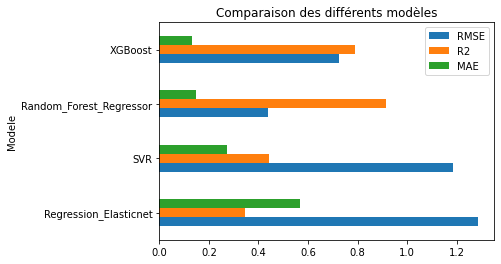

In [ ]:
results.plot.barh()
plt.title('Comparaison des différents modèles')

In [ ]:
### ON GARDE L'INDICATEUR RMSE COMME INDICATEUR DE QUALITE

In [ ]:
list_model = [elastic_grid,svm,rfr_search,xgb_grid]

In [ ]:
import timeit
results_time=pd.DataFrame()
time_mod=[]

for mod in list_model:

  start_time = timeit.default_timer()
  pred = mod.predict(X_train)
  elapsed = timeit.default_timer() - start_time
  time_mod.append(elapsed)

results_time['RMSE']=results['RMSE'].copy()
results_time['time']=time_mod
results_time


,RMSE,time
Modele,,
Regression_Elasticnet,1.286162,0.009199
SVR,1.185577,2.326590
Random_Forest_Regressor,0.438331,0.129739
XGBoost,0.725951,0.057870


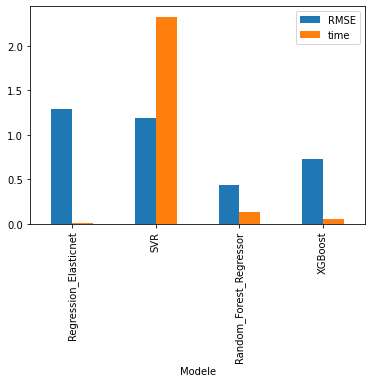

In [ ]:
results_time.plot.bar()

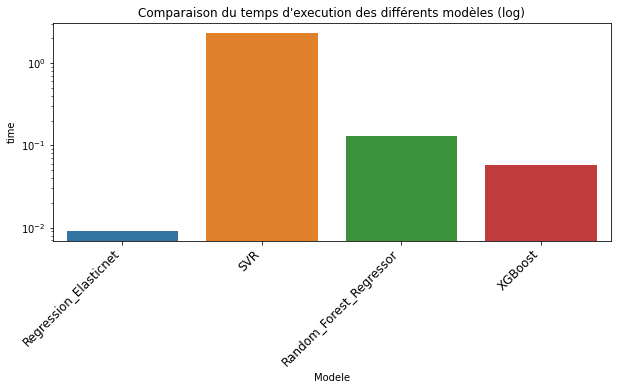

In [ ]:
plt.figure(figsize=(10,4))
plt.title('Comparaison du temps d\'execution des différents modèles (log)')
chart = sns.barplot(x = results_time.index,
           y = results_time['time'])
chart.set_xticklabels(labels = results_time.index, 
                      rotation=45,
                     horizontalalignment='right',
                     size=12,
                     )
ax = plt.gca()
ax.set_yscale('log')
#ax.set_ylim([0, 3])
plt.show()

In [ ]:
# Plot des valeurs modélisées avec les vrais valeurs pour le meilleur modèle : Rainforest

def plot_tru_mod(model,x_to_mod,y_true):

  plt.plot(model.predict(x_to_mod),y_true,'o',alpha=0.5)
  min_tru=y_true.min()
  max_tru=y_true.max()
  plt.plot([min_tru, max_tru], [min_tru, max_tru], '--') 
  plt.title('Comparaison des valeurs modélisées avec les valeurs réelles')
  plt.xlabel("mod")
  plt.ylabel("True")
  plt.show()

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)


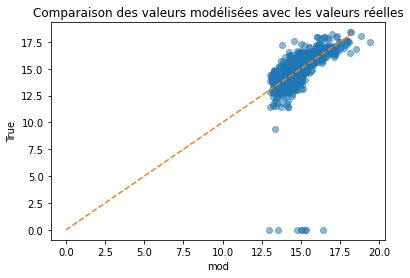


---------------------------------------------
GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'epsilon': array([0.001, 0.01 , 0.1  , 1.   ]),
                         'gamma': array([0.01, 0.1 , 1.  ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)


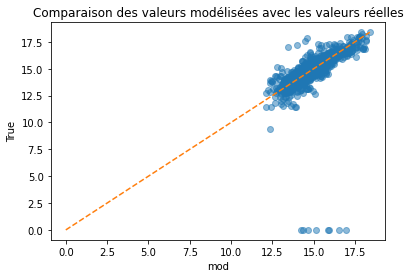


---------------------------------------------
GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_st

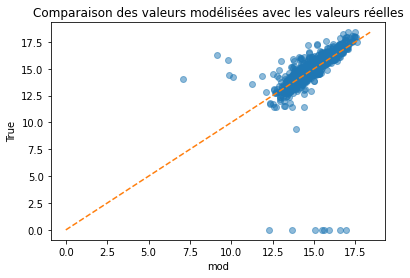


---------------------------------------------
GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=-1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.03, 0.05, 0.07, 0.1],
                 

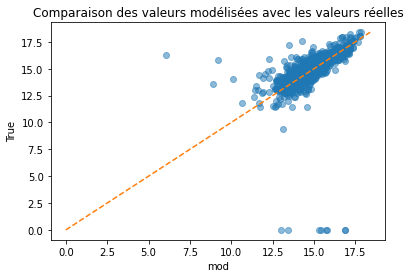


---------------------------------------------


In [ ]:
for mod in list_model:
  print(mod)
  plot_tru_mod(mod,X_test,y_test)
  print('')
  print('-'*45)

#Modélisation CO2

## Séparation en X et Y

In [ ]:
y_co2 = data[{'log_TotalGHGEmissions'}].copy()
X_co2 = data.drop(['log_TotalGHGEmissions', 'log_SiteEnergyUseWN(kBtu)'], axis=1).copy()

In [ ]:
ind_numeriq_X = ['Volume_building','NumberofFloors','PropertyGFABuilding(s)', 'PropertyGFAParking', 
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'OSEBuildingID',
       'DataYear', 'CouncilDistrictCode', 'YearBuilt', 'PropertyGFATotal',
       'Latitude', 'Longitude','ENERGYSTARScore']

## Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

scaler_co2 = StandardScaler()
X_co2[ind_numeriq_X] = scaler_co2.fit_transform(X_co2[ind_numeriq_X])

labelencoder=LabelEncoder()

for col in catego:
  X_co2[col] = labelencoder.fit_transform(X_co2[col])

X_co2.head()

,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,PropertyGFATotal,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,Latitude,Longitude,Volume_building
0,1.720851,-0.307112,0.175415,0.257889,-0.394223,0.300618,-0.049213,-1.783656,-1.005127,4,4,1.207185,3,-1.238666,0.072135,7,0,0,-0.250584,-0.111387,0.282842
1,1.492307,0.263592,0.176194,0.202290,-0.076743,-0.107931,-0.591668,-1.783571,-1.005127,4,4,1.207185,3,0.848898,0.223162,7,10,1,-0.231515,0.058676,0.234585
2,1.263763,-0.307112,-0.135432,-0.073142,1.356855,2.214131,-2.529005,-1.783316,-1.005127,4,4,1.207185,3,-1.268921,-0.198479,7,0,0,-0.208395,-0.060494,0.036286
3,3.092113,0.164939,0.393193,0.685333,1.633921,-0.715574,0.028280,-1.783061,-1.005127,4,4,1.207185,3,0.364825,0.386086,7,10,1,-0.218006,-0.218646,0.763029
4,-0.564587,1.102147,-0.149533,0.262723,-0.351374,1.268378,-1.730822,-1.782976,-1.005127,5,6,1.207185,3,0.939661,0.160504,10,0,0,-0.162093,-0.066190,-0.235042


###Split train/test

In [ ]:
from sklearn.model_selection import train_test_split

#division en 70/30 %

X_co2_train, X_co2_test, y_co2_train, y_co2_test = train_test_split(X_co2,y_co2, test_size=0.3)

print('X_train',X_co2_train.shape)
print('X_test:',X_co2_test.shape)
print('y_train',y_co2_train.shape)
print('y_test:',y_co2_test.shape)

X_train (4653, 21)
X_test: (1995, 21)
y_train (4653, 1)
y_test: (1995, 1)


### Modélisation ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

### RMSE

In [ ]:
from sklearn.linear_model import ElasticNet

param = {"alpha": np.logspace(-3, 3, 7),  #alpha, coef qui multiplie le terme de pénalité)
              "l1_ratio": np.arange(0.0, 1.0, 0.1)} #L1 ratio , =1 équivaut à un Lasso, 0 à un Ridge


elastic_grid_co2 = GridSearchCV(estimator = ElasticNet(), 
                      param_grid = param,
                      scoring = 'neg_mean_squared_error',
                      cv=5)

elastic_grid_co2.fit(X_co2_train, y_co2_train)

print('-'*45)
print(elastic_grid_co2.best_params_)
print(elastic_grid_co2.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1844.3499298096206, tolerance: 0.7132967040024882
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1870.1851541767041, tolerance: 0.7153084042921143
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1835.191202300826, tolerance: 0.7011667213233804
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1904.96

---------------------------------------------
{'alpha': 0.001, 'l1_ratio': 0.9}
-1.0211352873089294


### R2

In [ ]:
from sklearn.linear_model import ElasticNet

param = {"alpha": np.logspace(-3, 3, 7),  #alpha, coef qui multiplie le terme de pénalité)
              "l1_ratio": np.arange(0.0, 1.0, 0.1)} #L1 ratio , =1 équivaut à un Lasso, 0 à un Ridge


elastic_grid_co2_r2 = GridSearchCV(estimator = ElasticNet(), 
                      param_grid = param,
                      scoring = 'r2',
                      cv=5)

elastic_grid_co2_r2.fit(X_co2_train, y_co2_train)

print('-'*45)
print(elastic_grid_co2_r2.best_params_)
print(elastic_grid_co2_r2.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1844.3499298096206, tolerance: 0.7132967040024882
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1870.1851541767041, tolerance: 0.7153084042921143
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1835.191202300826, tolerance: 0.7011667213233804
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1904.96

---------------------------------------------
{'alpha': 0.001, 'l1_ratio': 0.9}
0.4671906382676573


### MAE

In [ ]:
from sklearn.linear_model import ElasticNet

param = {"alpha": np.logspace(-3, 3, 7),  #alpha, coef qui multiplie le terme de pénalité)
              "l1_ratio": np.arange(0.0, 1.0, 0.1)} #L1 ratio , =1 équivaut à un Lasso, 0 à un Ridge


elastic_grid_co2_MAE = GridSearchCV(estimator = ElasticNet(), 
                      param_grid = param,
                      scoring = 'neg_mean_absolute_error',
                      cv=5)

elastic_grid_co2_MAE.fit(X_co2_train, y_co2_train)

print('-'*45)
print(elastic_grid_co2_MAE.best_params_)
print(elastic_grid_co2_MAE.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1844.3499298096206, tolerance: 0.7132967040024882
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1870.1851541767041, tolerance: 0.7153084042921143
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1835.191202300826, tolerance: 0.7011667213233804
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1904.96

---------------------------------------------
{'alpha': 0.001, 'l1_ratio': 0.0}
-0.8423292484616278


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2345.3160551274163, tolerance: 0.8927778058988443
  positive)


### RESULTATS

In [ ]:
import math

results_co2 = pd.DataFrame({})
results_co2 = results_co2.append(pd.DataFrame({'Modele' : ['Regression_Elasticnet'],'RMSE' : [math.sqrt(sklearn.metrics.mean_squared_error(y_co2_train,elastic_grid_co2.predict(X_co2_train)))],
                                       'R2' : [sklearn.metrics.r2_score(y_co2_train,elastic_grid_co2_r2.predict(X_co2_train))] ,
                                       'MAE' : [sklearn.metrics.mean_absolute_error(y_co2_train,elastic_grid_co2_MAE.predict(X_co2_train))]}),ignore_index=True)

In [ ]:
results_co2

,Modele,RMSE,R2,MAE
0,Regression_Elasticnet,1.003489,0.475175,0.836921


In [ ]:
###pickle.dump(elastic_grid_co2, open('P4_elastic_grid_co2.pickle', 'wb'))

##Modélisation Support Vector Machine (SVM)

### RMSE

In [ ]:
from sklearn.svm import SVR

parameters = {'gamma' : np.logspace(-2, 0, 3), #kernel coefficient 
              'C' : np.logspace(-2, 2, 5), #parametre de régularisation
              'epsilon' : np.logspace(-3, 0, 4)} #erreur tolérée  

svm_co2 = GridSearchCV(estimator = SVR(kernel='rbf'), 
                      param_grid = parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5,
                      verbose=2
                     )

svm_co2.fit(X_co2_train, y_co2_train)

print('-'*45)
print(svm_co2.best_params_)
print(svm_co2.best_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................
[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   1.5s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   1.5s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   1.5s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.01, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=0.01, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.01, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.01, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.01, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.1, gamma=0.01, total=   1.3s
[CV] C=0.01, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.01, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.01, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.01, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.01, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.01, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.01, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.01, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.01, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.01, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=0.1, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=0.1, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=0.1, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=0.1, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=0.01, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=0.01, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=0.01, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=0.01, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=0.01, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=0.1, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.1, epsilon=0.001, gamma=0.01, total=   1.6s
[CV] C=0.1, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.1, epsilon=0.001, gamma=0.01, total=   1.7s
[CV] C=0.1, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.1, epsilon=0.001, gamma=0.01, total=   1.6s
[CV] C=0.1, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.1, epsilon=0.001, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.1, epsilon=0.001, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=0.1, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=0.1, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=0.1, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=0.1, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=0.1, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=1.0, total=   1.7s
[CV] C=0.1, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=1.0, total=   1.7s
[CV] C=0.1, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=1.0, total=   1.7s
[CV] C=0.1, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=0.1, total=   1.5s
[CV] C=0.1, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=0.1, total=   1.5s
[CV] C=0.1, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=0.1, total=   1.5s
[CV] C=0.1, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=0.1, total=   1.5s
[CV] C=0.1, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=0.1, total=   1.5s
[CV] C=0.1, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=1.0, total=   1.7s
[CV] C=0.1, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=1.0, total=   1.7s
[CV] C=0.1, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.1, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.1, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.1, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.1, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.1, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=0.1, total=   1.4s
[CV] C=0.1, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=0.1, total=   1.4s
[CV] C=0.1, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=0.1, total=   1.4s
[CV] C=0.1, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=0.1, total=   1.4s
[CV] C=0.1, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=0.1, total=   1.4s
[CV] C=0.1, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.1, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.1, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.1, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=1.0, gamma=0.01, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=1.0, gamma=0.01, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=0.1, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=1.0, gamma=0.01, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=1.0, gamma=0.01, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=0.1, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=0.1, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=0.1, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=0.1, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=1.0, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1.0, epsilon=0.001, gamma=0.01, total=   1.6s
[CV] C=1.0, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1.0, epsilon=0.001, gamma=0.01, total=   1.6s
[CV] C=1.0, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1.0, epsilon=0.001, gamma=0.01, total=   1.6s
[CV] C=1.0, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1.0, epsilon=0.001, gamma=0.01, total=   1.6s
[CV] C=1.0, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1.0, epsilon=0.001, gamma=0.01, total=   1.6s
[CV] C=1.0, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=0.1, total=   1.9s
[CV] C=1.0, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=0.1, total=   1.9s
[CV] C=1.0, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=0.1, total=   2.0s
[CV] C=1.0, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=0.1, total=   1.9s
[CV] C=1.0, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=0.1, total=   1.9s
[CV] C=1.0, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=1.0, total=   2.2s
[CV] C=1.0, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=1.0, total=   2.1s
[CV] C=1.0, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=1.0, total=   2.3s
[CV] C=1.0, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=1.0, total=   2.2s
[CV] C=1.0, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=1.0, total=   2.2s
[CV] C=1.0, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.01, gamma=0.01, total=   1.6s
[CV] C=1.0, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.01, gamma=0.01, total=   1.6s
[CV] C=1.0, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.01, gamma=0.01, total=   1.6s
[CV] C=1.0, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.01, gamma=0.01, total=   1.6s
[CV] C=1.0, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.01, gamma=0.01, total=   1.6s
[CV] C=1.0, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=0.1, total=   2.1s
[CV] C=1.0, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=0.1, total=   2.0s
[CV] C=1.0, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=0.1, total=   2.0s
[CV] C=1.0, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=0.1, total=   2.0s
[CV] C=1.0, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=0.1, total=   2.0s
[CV] C=1.0, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=1.0, total=   2.2s
[CV] C=1.0, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=1.0, total=   2.4s
[CV] C=1.0, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=1.0, total=   2.4s
[CV] C=1.0, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=1.0, total=   2.4s
[CV] C=1.0, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=1.0, total=   2.5s
[CV] C=1.0, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.1, gamma=0.01, total=   1.5s
[CV] C=1.0, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=1.0, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.1, gamma=0.01, total=   1.5s
[CV] C=1.0, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.1, gamma=0.01, total=   1.5s
[CV] C=1.0, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.1, gamma=0.01, total=   1.5s
[CV] C=1.0, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=0.1, total=   1.6s
[CV] C=1.0, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=0.1, total=   1.6s
[CV] C=1.0, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=0.1, total=   1.6s
[CV] C=1.0, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=0.1, total=   1.6s
[CV] C=1.0, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=0.1, total=   1.6s
[CV] C=1.0, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=1.0, total=   1.9s
[CV] C=1.0, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=1.0, total=   1.9s
[CV] C=1.0, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=1.0, total=   1.9s
[CV] C=1.0, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=1.0, total=   1.9s
[CV] C=1.0, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=1.0, total=   1.9s
[CV] C=1.0, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=1.0, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=1.0, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=1.0, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=1.0, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=1.0, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=1.0, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=1.0, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=1.0, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=1.0, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=1.0, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=1.0, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=1.0, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=1.0, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=1.0, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=10.0, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10.0, epsilon=0.001, gamma=0.01, total=   2.5s
[CV] C=10.0, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10.0, epsilon=0.001, gamma=0.01, total=   2.6s
[CV] C=10.0, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10.0, epsilon=0.001, gamma=0.01, total=   2.6s
[CV] C=10.0, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10.0, epsilon=0.001, gamma=0.01, total=   2.6s
[CV] C=10.0, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10.0, epsilon=0.001, gamma=0.01, total=   2.6s
[CV] C=10.0, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=0.1, total=   4.6s
[CV] C=10.0, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=0.1, total=   4.7s
[CV] C=10.0, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=0.1, total=   4.6s
[CV] C=10.0, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=0.1, total=   4.6s
[CV] C=10.0, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=0.1, total=   4.6s
[CV] C=10.0, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=1.0, total=   3.3s
[CV] C=10.0, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=1.0, total=   3.3s
[CV] C=10.0, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=1.0, total=   3.3s
[CV] C=10.0, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=1.0, total=   3.3s
[CV] C=10.0, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=1.0, total=   3.3s
[CV] C=10.0, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.01, gamma=0.01, total=   2.4s
[CV] C=10.0, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.01, gamma=0.01, total=   2.4s
[CV] C=10.0, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.01, gamma=0.01, total=   2.5s
[CV] C=10.0, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.01, gamma=0.01, total=   2.4s
[CV] C=10.0, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.01, gamma=0.01, total=   2.4s
[CV] C=10.0, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=0.1, total=   3.9s
[CV] C=10.0, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=0.1, total=   4.0s
[CV] C=10.0, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=0.1, total=   3.9s
[CV] C=10.0, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=0.1, total=   4.0s
[CV] C=10.0, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=0.1, total=   4.0s
[CV] C=10.0, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=1.0, total=   3.2s
[CV] C=10.0, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=1.0, total=   3.2s
[CV] C=10.0, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=1.0, total=   3.2s
[CV] C=10.0, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=1.0, total=   3.2s
[CV] C=10.0, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=1.0, total=   3.2s
[CV] C=10.0, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.1, gamma=0.01, total=   2.2s
[CV] C=10.0, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.1, gamma=0.01, total=   2.1s
[CV] C=10.0, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.1, gamma=0.01, total=   2.1s
[CV] C=10.0, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.1, gamma=0.01, total=   2.1s
[CV] C=10.0, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.1, gamma=0.01, total=   2.1s
[CV] C=10.0, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=0.1, total=   3.1s
[CV] C=10.0, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=0.1, total=   3.0s
[CV] C=10.0, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=0.1, total=   3.1s
[CV] C=10.0, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=0.1, total=   3.1s
[CV] C=10.0, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=0.1, total=   3.1s
[CV] C=10.0, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=1.0, total=   2.7s
[CV] C=10.0, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=1.0, total=   2.7s
[CV] C=10.0, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=1.0, total=   2.7s
[CV] C=10.0, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=1.0, total=   3.2s
[CV] C=10.0, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=1.0, total=   3.1s
[CV] C=10.0, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=10.0, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=10.0, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=10.0, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=10.0, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=10.0, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=10.0, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=0.1, total=   0.7s
[CV] C=10.0, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=0.1, total=   0.7s
[CV] C=10.0, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=0.1, total=   0.7s
[CV] C=10.0, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=0.1, total=   0.7s
[CV] C=10.0, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=1.0, total=   1.1s
[CV] C=10.0, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=1.0, total=   1.1s
[CV] C=10.0, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=10.0, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=1.0, total=   1.1s
[CV] C=10.0, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=1.0, total=   1.1s
[CV] C=100.0, epsilon=0.001, gamma=0.01 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100.0, epsilon=0.001, gamma=0.01, total=  12.5s
[CV] C=100.0, epsilon=0.001, gamma=0.01 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100.0, epsilon=0.001, gamma=0.01, total=  13.0s
[CV] C=100.0, epsilon=0.001, gamma=0.01 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100.0, epsilon=0.001, gamma=0.01, total=  13.0s
[CV] C=100.0, epsilon=0.001, gamma=0.01 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100.0, epsilon=0.001, gamma=0.01, total=  12.2s
[CV] C=100.0, epsilon=0.001, gamma=0.01 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100.0, epsilon=0.001, gamma=0.01, total=  12.0s
[CV] C=100.0, epsilon=0.001, gamma=0.1 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=0.1, total=  11.9s
[CV] C=100.0, epsilon=0.001, gamma=0.1 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=0.1, total=  12.0s
[CV] C=100.0, epsilon=0.001, gamma=0.1 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=0.1, total=  12.3s
[CV] C=100.0, epsilon=0.001, gamma=0.1 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=0.1, total=  12.1s
[CV] C=100.0, epsilon=0.001, gamma=0.1 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=0.1, total=  13.9s
[CV] C=100.0, epsilon=0.001, gamma=1.0 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=1.0, total=   3.9s
[CV] C=100.0, epsilon=0.001, gamma=1.0 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=1.0, total=   3.8s
[CV] C=100.0, epsilon=0.001, gamma=1.0 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=1.0, total=   3.9s
[CV] C=100.0, epsilon=0.001, gamma=1.0 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=1.0, total=   3.5s
[CV] C=100.0, epsilon=0.001, gamma=1.0 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=1.0, total=   3.5s
[CV] C=100.0, epsilon=0.01, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.01, gamma=0.01, total=  10.9s
[CV] C=100.0, epsilon=0.01, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.01, gamma=0.01, total=  10.8s
[CV] C=100.0, epsilon=0.01, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.01, gamma=0.01, total=  10.6s
[CV] C=100.0, epsilon=0.01, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.01, gamma=0.01, total=  10.5s
[CV] C=100.0, epsilon=0.01, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.01, gamma=0.01, total=  10.3s
[CV] C=100.0, epsilon=0.01, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=0.1, total=   9.8s
[CV] C=100.0, epsilon=0.01, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=0.1, total=   9.9s
[CV] C=100.0, epsilon=0.01, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=0.1, total=  10.8s
[CV] C=100.0, epsilon=0.01, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=0.1, total=  10.2s
[CV] C=100.0, epsilon=0.01, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=0.1, total=  10.3s
[CV] C=100.0, epsilon=0.01, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=1.0, total=   3.5s
[CV] C=100.0, epsilon=0.01, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=1.0, total=   3.4s
[CV] C=100.0, epsilon=0.01, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=1.0, total=   3.4s
[CV] C=100.0, epsilon=0.01, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=1.0, total=   3.3s
[CV] C=100.0, epsilon=0.01, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=1.0, total=   3.4s
[CV] C=100.0, epsilon=0.1, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.1, gamma=0.01, total=   8.0s
[CV] C=100.0, epsilon=0.1, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.1, gamma=0.01, total=   8.0s
[CV] C=100.0, epsilon=0.1, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.1, gamma=0.01, total=   8.1s
[CV] C=100.0, epsilon=0.1, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.1, gamma=0.01, total=   9.4s
[CV] C=100.0, epsilon=0.1, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.1, gamma=0.01, total=   7.9s
[CV] C=100.0, epsilon=0.1, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=0.1, total=   7.3s
[CV] C=100.0, epsilon=0.1, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=0.1, total=   7.5s
[CV] C=100.0, epsilon=0.1, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=0.1, total=   7.3s
[CV] C=100.0, epsilon=0.1, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=0.1, total=   7.0s
[CV] C=100.0, epsilon=0.1, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=0.1, total=   7.7s
[CV] C=100.0, epsilon=0.1, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=1.0, total=   2.8s
[CV] C=100.0, epsilon=0.1, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=1.0, total=   2.8s
[CV] C=100.0, epsilon=0.1, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=1.0, total=   2.8s
[CV] C=100.0, epsilon=0.1, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=1.0, total=   2.8s
[CV] C=100.0, epsilon=0.1, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=1.0, total=   2.8s
[CV] C=100.0, epsilon=1.0, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=1.0, gamma=0.01, total=   2.0s
[CV] C=100.0, epsilon=1.0, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=1.0, gamma=0.01, total=   2.0s
[CV] C=100.0, epsilon=1.0, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=1.0, gamma=0.01, total=   1.8s
[CV] C=100.0, epsilon=1.0, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=1.0, gamma=0.01, total=   1.9s
[CV] C=100.0, epsilon=1.0, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=1.0, gamma=0.01, total=   1.8s
[CV] C=100.0, epsilon=1.0, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=100.0, epsilon=1.0, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=100.0, epsilon=1.0, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=100.0, epsilon=1.0, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=100.0, epsilon=1.0, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=100.0, epsilon=1.0, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=1.0, total=   1.1s
[CV] C=100.0, epsilon=1.0, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=100.0, epsilon=1.0, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=100.0, epsilon=1.0, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=1.0, total=   1.1s
[CV] C=100.0, epsilon=1.0, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=1.0, total=   1.0s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 13.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------------------------------
{'C': 10.0, 'epsilon': 0.1, 'gamma': 0.01}
-0.7755145432633186


### R2

In [ ]:
from sklearn.svm import SVR

parameters = {'gamma' : np.logspace(-2, 0, 3), #kernel coefficient 
              'C' : np.logspace(-2, 2, 5), #parametre de régularisation
              'epsilon' : np.logspace(-3, 0, 4)} #erreur tolérée  

svm_co2_r2 = GridSearchCV(estimator = SVR(kernel='rbf'), 
                      param_grid = parameters,
                      scoring = 'r2',
                      cv=5,
                      verbose=2
                     )

svm_co2_r2.fit(X_co2_train, y_co2_train)

print('-'*45)
print(svm_co2_r2.best_params_)
print(svm_co2_r2.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   1.5s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   1.5s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   1.5s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   1.5s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   1.5s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=0.01, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=0.01, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.01, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=0.01, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=0.01, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.1, gamma=0.01, total=   1.3s
[CV] C=0.01, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.01, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.01, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.01, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.01, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.01, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=1.0, total=   1.7s
[CV] C=0.01, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=1.0, total=   1.7s
[CV] C=0.01, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=1.0, total=   1.7s
[CV] C=0.01, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=1.0, gamma=0.01, total=   0.9s
[CV] C=0.01, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=1.0, gamma=0.01, total=   0.8s
[CV] C=0.01, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=1.0, gamma=0.01, total=   0.8s
[CV] C=0.01, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=0.1, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=0.1, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=0.1, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=0.1, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=0.1, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=0.01, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=0.01, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=0.01, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=0.01, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=0.1, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.1, epsilon=0.001, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.1, epsilon=0.001, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.1, epsilon=0.001, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.1, epsilon=0.001, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.1, epsilon=0.001, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=0.1, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=0.1, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=0.1, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=0.1, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=0.1, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=1.0, total=   1.7s
[CV] C=0.1, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=1.0, total=   1.7s
[CV] C=0.1, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=1.0, total=   1.7s
[CV] C=0.1, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=0.1, total=   1.5s
[CV] C=0.1, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=0.1, total=   1.5s
[CV] C=0.1, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=0.1, total=   1.5s
[CV] C=0.1, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=0.1, total=   1.4s
[CV] C=0.1, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=0.1, total=   1.4s
[CV] C=0.1, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=1.0, total=   1.7s
[CV] C=0.1, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.1, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.1, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.1, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.1, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.1, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.1, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.1, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=0.1, total=   1.4s
[CV] C=0.1, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.1, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.1, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.1, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.1, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.1, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.1, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=0.1, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=1.0, gamma=0.01, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=0.1, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=1.0, gamma=0.01, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=1.0, gamma=0.01, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=0.1, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=0.1, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=0.1, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=0.1, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=1.0, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1.0, epsilon=0.001, gamma=0.01, total=   1.6s
[CV] C=1.0, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1.0, epsilon=0.001, gamma=0.01, total=   1.6s
[CV] C=1.0, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1.0, epsilon=0.001, gamma=0.01, total=   1.5s
[CV] C=1.0, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1.0, epsilon=0.001, gamma=0.01, total=   1.6s
[CV] C=1.0, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1.0, epsilon=0.001, gamma=0.01, total=   1.6s
[CV] C=1.0, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=0.1, total=   1.9s
[CV] C=1.0, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=0.1, total=   1.9s
[CV] C=1.0, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=0.1, total=   1.9s
[CV] C=1.0, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=0.1, total=   1.9s
[CV] C=1.0, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=0.1, total=   1.9s
[CV] C=1.0, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=1.0, total=   2.2s
[CV] C=1.0, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=1.0, total=   2.1s
[CV] C=1.0, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=1.0, total=   2.2s
[CV] C=1.0, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=1.0, total=   2.2s
[CV] C=1.0, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=1.0, total=   2.2s
[CV] C=1.0, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=1.0, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=1.0, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=1.0, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=1.0, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=1.0, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=0.1, total=   1.8s
[CV] C=1.0, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=0.1, total=   1.8s
[CV] C=1.0, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=0.1, total=   1.8s
[CV] C=1.0, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=0.1, total=   1.8s
[CV] C=1.0, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=0.1, total=   1.8s
[CV] C=1.0, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=1.0, total=   2.1s
[CV] C=1.0, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=1.0, total=   2.1s
[CV] C=1.0, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=1.0, total=   2.1s
[CV] C=1.0, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=1.0, total=   2.1s
[CV] C=1.0, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=1.0, total=   2.1s
[CV] C=1.0, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=1.0, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=1.0, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=1.0, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=1.0, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=1.0, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=0.1, total=   1.6s
[CV] C=1.0, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=0.1, total=   1.7s
[CV] C=1.0, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=0.1, total=   1.8s
[CV] C=1.0, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=0.1, total=   1.7s
[CV] C=1.0, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=0.1, total=   1.8s
[CV] C=1.0, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=1.0, total=   1.9s
[CV] C=1.0, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=1.0, total=   1.8s
[CV] C=1.0, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=1.0, total=   1.9s
[CV] C=1.0, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=1.0, total=   1.8s
[CV] C=1.0, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=1.0, total=   1.8s
[CV] C=1.0, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=1.0, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=1.0, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=1.0, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=1.0, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=1.0, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=1.0, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=1.0, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=1.0, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=1.0, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=1.0, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=1.0, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=1.0, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=1.0, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=1.0, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=10.0, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10.0, epsilon=0.001, gamma=0.01, total=   2.4s
[CV] C=10.0, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10.0, epsilon=0.001, gamma=0.01, total=   2.5s
[CV] C=10.0, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10.0, epsilon=0.001, gamma=0.01, total=   2.5s
[CV] C=10.0, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10.0, epsilon=0.001, gamma=0.01, total=   2.5s
[CV] C=10.0, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10.0, epsilon=0.001, gamma=0.01, total=   2.4s
[CV] C=10.0, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=0.1, total=   4.5s
[CV] C=10.0, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=0.1, total=   4.4s
[CV] C=10.0, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=0.1, total=   4.5s
[CV] C=10.0, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=0.1, total=   4.4s
[CV] C=10.0, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=0.1, total=   4.4s
[CV] C=10.0, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=1.0, total=   3.2s
[CV] C=10.0, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=1.0, total=   3.2s
[CV] C=10.0, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=1.0, total=   3.2s
[CV] C=10.0, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=1.0, total=   3.2s
[CV] C=10.0, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=1.0, total=   3.2s
[CV] C=10.0, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.01, gamma=0.01, total=   2.4s
[CV] C=10.0, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.01, gamma=0.01, total=   2.4s
[CV] C=10.0, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.01, gamma=0.01, total=   2.4s
[CV] C=10.0, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.01, gamma=0.01, total=   2.4s
[CV] C=10.0, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.01, gamma=0.01, total=   2.4s
[CV] C=10.0, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=0.1, total=   3.9s
[CV] C=10.0, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=0.1, total=   3.9s
[CV] C=10.0, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=0.1, total=   3.8s
[CV] C=10.0, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=0.1, total=   3.9s
[CV] C=10.0, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=0.1, total=   3.9s
[CV] C=10.0, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=1.0, total=   3.1s
[CV] C=10.0, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=1.0, total=   3.2s
[CV] C=10.0, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=1.0, total=   3.1s
[CV] C=10.0, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=1.0, total=   3.1s
[CV] C=10.0, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=1.0, total=   3.1s
[CV] C=10.0, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.1, gamma=0.01, total=   2.1s
[CV] C=10.0, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.1, gamma=0.01, total=   2.0s
[CV] C=10.0, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.1, gamma=0.01, total=   2.1s
[CV] C=10.0, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.1, gamma=0.01, total=   2.0s
[CV] C=10.0, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.1, gamma=0.01, total=   2.0s
[CV] C=10.0, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=0.1, total=   3.0s
[CV] C=10.0, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=0.1, total=   3.0s
[CV] C=10.0, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=0.1, total=   3.0s
[CV] C=10.0, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=0.1, total=   2.9s
[CV] C=10.0, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=0.1, total=   3.0s
[CV] C=10.0, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=1.0, total=   2.8s
[CV] C=10.0, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=1.0, total=   2.9s
[CV] C=10.0, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=1.0, total=   2.8s
[CV] C=10.0, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=1.0, total=   2.9s
[CV] C=10.0, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=1.0, total=   2.7s
[CV] C=10.0, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=10.0, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=10.0, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=10.0, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=10.0, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=10.0, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=10.0, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=0.1, total=   0.7s
[CV] C=10.0, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=10.0, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=10.0, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=10.0, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=1.0, total=   1.1s
[CV] C=10.0, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=1.0, total=   1.1s
[CV] C=10.0, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=10.0, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=1.0, total=   1.1s
[CV] C=10.0, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=1.0, total=   1.1s
[CV] C=100.0, epsilon=0.001, gamma=0.01 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100.0, epsilon=0.001, gamma=0.01, total=  12.1s
[CV] C=100.0, epsilon=0.001, gamma=0.01 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100.0, epsilon=0.001, gamma=0.01, total=  12.6s
[CV] C=100.0, epsilon=0.001, gamma=0.01 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100.0, epsilon=0.001, gamma=0.01, total=  12.7s
[CV] C=100.0, epsilon=0.001, gamma=0.01 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100.0, epsilon=0.001, gamma=0.01, total=  12.0s
[CV] C=100.0, epsilon=0.001, gamma=0.01 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100.0, epsilon=0.001, gamma=0.01, total=  11.6s
[CV] C=100.0, epsilon=0.001, gamma=0.1 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=0.1, total=  11.7s
[CV] C=100.0, epsilon=0.001, gamma=0.1 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=0.1, total=  11.8s
[CV] C=100.0, epsilon=0.001, gamma=0.1 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=0.1, total=  12.1s
[CV] C=100.0, epsilon=0.001, gamma=0.1 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=0.1, total=  11.8s
[CV] C=100.0, epsilon=0.001, gamma=0.1 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=0.1, total=  12.8s
[CV] C=100.0, epsilon=0.001, gamma=1.0 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=1.0, total=   3.5s
[CV] C=100.0, epsilon=0.001, gamma=1.0 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=1.0, total=   3.4s
[CV] C=100.0, epsilon=0.001, gamma=1.0 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=1.0, total=   3.4s
[CV] C=100.0, epsilon=0.001, gamma=1.0 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=1.0, total=   3.6s
[CV] C=100.0, epsilon=0.001, gamma=1.0 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=1.0, total=   4.0s
[CV] C=100.0, epsilon=0.01, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.01, gamma=0.01, total=  10.9s
[CV] C=100.0, epsilon=0.01, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.01, gamma=0.01, total=  10.7s
[CV] C=100.0, epsilon=0.01, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.01, gamma=0.01, total=  10.4s
[CV] C=100.0, epsilon=0.01, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.01, gamma=0.01, total=  10.4s
[CV] C=100.0, epsilon=0.01, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.01, gamma=0.01, total=  10.1s
[CV] C=100.0, epsilon=0.01, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=0.1, total=   9.7s
[CV] C=100.0, epsilon=0.01, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=0.1, total=   9.9s
[CV] C=100.0, epsilon=0.01, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=0.1, total=  10.6s
[CV] C=100.0, epsilon=0.01, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=0.1, total=  10.0s
[CV] C=100.0, epsilon=0.01, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=0.1, total=  10.2s
[CV] C=100.0, epsilon=0.01, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=1.0, total=   3.4s
[CV] C=100.0, epsilon=0.01, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=1.0, total=   3.3s
[CV] C=100.0, epsilon=0.01, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=1.0, total=   3.3s
[CV] C=100.0, epsilon=0.01, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=1.0, total=   3.4s
[CV] C=100.0, epsilon=0.01, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=1.0, total=   3.4s
[CV] C=100.0, epsilon=0.1, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.1, gamma=0.01, total=   7.8s
[CV] C=100.0, epsilon=0.1, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.1, gamma=0.01, total=   7.9s
[CV] C=100.0, epsilon=0.1, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.1, gamma=0.01, total=   7.9s
[CV] C=100.0, epsilon=0.1, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.1, gamma=0.01, total=   8.5s
[CV] C=100.0, epsilon=0.1, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.1, gamma=0.01, total=   7.9s
[CV] C=100.0, epsilon=0.1, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=0.1, total=   8.1s
[CV] C=100.0, epsilon=0.1, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=0.1, total=   7.9s
[CV] C=100.0, epsilon=0.1, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=0.1, total=   7.8s
[CV] C=100.0, epsilon=0.1, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=0.1, total=   6.8s
[CV] C=100.0, epsilon=0.1, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=0.1, total=   7.5s
[CV] C=100.0, epsilon=0.1, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=1.0, total=   2.8s
[CV] C=100.0, epsilon=0.1, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=1.0, total=   2.7s
[CV] C=100.0, epsilon=0.1, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=1.0, total=   2.7s
[CV] C=100.0, epsilon=0.1, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=1.0, total=   2.8s
[CV] C=100.0, epsilon=0.1, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=1.0, total=   2.7s
[CV] C=100.0, epsilon=1.0, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=1.0, gamma=0.01, total=   2.0s
[CV] C=100.0, epsilon=1.0, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=1.0, gamma=0.01, total=   2.0s
[CV] C=100.0, epsilon=1.0, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=1.0, gamma=0.01, total=   1.7s
[CV] C=100.0, epsilon=1.0, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=1.0, gamma=0.01, total=   1.9s
[CV] C=100.0, epsilon=1.0, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=1.0, gamma=0.01, total=   1.8s
[CV] C=100.0, epsilon=1.0, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=100.0, epsilon=1.0, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=100.0, epsilon=1.0, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=100.0, epsilon=1.0, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=100.0, epsilon=1.0, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=100.0, epsilon=1.0, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=100.0, epsilon=1.0, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=100.0, epsilon=1.0, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=100.0, epsilon=1.0, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=1.0, total=   1.1s
[CV] C=100.0, epsilon=1.0, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=1.0, total=   1.0s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 12.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------------------------------
{'C': 10.0, 'epsilon': 0.1, 'gamma': 0.01}
0.5959425801366276


### MAE

In [ ]:
from sklearn.svm import SVR

parameters = {'gamma' : np.logspace(-2, 0, 3), #kernel coefficient 
              'C' : np.logspace(-2, 2, 5), #parametre de régularisation
              'epsilon' : np.logspace(-3, 0, 4)} #erreur tolérée  

svm_co2_MAE = GridSearchCV(estimator = SVR(kernel='rbf'), 
                      param_grid = parameters,
                      scoring = 'neg_mean_absolute_error',
                      cv=5,
                      verbose=2
                     )

svm_co2_MAE.fit(X_co2_train, y_co2_train)

print('-'*45)
print(svm_co2_MAE.best_params_)
print(svm_co2_MAE.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.01, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.01, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.01, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.01, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.01, epsilon=0.01, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=0.1, total=   1.4s
[CV] C=0.01, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.01, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.1, gamma=0.01, total=   1.3s
[CV] C=0.01, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.01, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.01, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.01, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.01, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.01, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.01, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.01, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.01, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.01, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.01, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.01, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=0.1, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=0.1, total=   0.7s
[CV] C=0.01, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=0.01, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=0.01, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=0.01, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=0.01, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=0.01, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=0.01, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=0.01, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=0.1, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.1, epsilon=0.001, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.1, epsilon=0.001, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.1, epsilon=0.001, gamma=0.01, total=   1.4s
[CV] C=0.1, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.1, epsilon=0.001, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.1, epsilon=0.001, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=0.1, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=0.1, total=   1.4s
[CV] C=0.1, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=0.1, total=   1.4s
[CV] C=0.1, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=0.1, total=   1.5s
[CV] C=0.1, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=0.1, total=   1.4s
[CV] C=0.1, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.001, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=0.1, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.01, gamma=0.01, total=   1.4s
[CV] C=0.1, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.01, gamma=0.01, total=   1.4s
[CV] C=0.1, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.01, gamma=0.01, total=   1.4s
[CV] C=0.1, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.1, epsilon=0.01, gamma=0.01, total=   1.4s
[CV] C=0.1, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=0.1, total=   1.4s
[CV] C=0.1, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=0.1, total=   1.4s
[CV] C=0.1, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=0.1, total=   1.5s
[CV] C=0.1, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=0.1, total=   1.4s
[CV] C=0.1, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=0.1, total=   1.4s
[CV] C=0.1, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.01, gamma=1.0, total=   1.6s
[CV] C=0.1, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.1, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.1, gamma=0.01, total=   1.3s
[CV] C=0.1, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=0.1, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.1, gamma=0.01, total=   1.3s
[CV] C=0.1, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=0.1, gamma=0.01, total=   1.3s
[CV] C=0.1, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.1, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=0.1, total=   1.4s
[CV] C=0.1, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.1, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.1, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=0.1, total=   1.3s
[CV] C=0.1, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.1, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.1, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.1, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.1, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=0.1, gamma=1.0, total=   1.5s
[CV] C=0.1, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=0.1, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=1.0, gamma=0.01, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=0.1, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=0.1, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=0.1, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=0.1, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=0.1, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=0.1, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=0.1, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=0.1, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=1.0, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1.0, epsilon=0.001, gamma=0.01, total=   1.5s
[CV] C=1.0, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1.0, epsilon=0.001, gamma=0.01, total=   1.6s
[CV] C=1.0, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1.0, epsilon=0.001, gamma=0.01, total=   1.5s
[CV] C=1.0, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1.0, epsilon=0.001, gamma=0.01, total=   1.6s
[CV] C=1.0, epsilon=0.001, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1.0, epsilon=0.001, gamma=0.01, total=   1.6s
[CV] C=1.0, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=0.1, total=   1.9s
[CV] C=1.0, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=0.1, total=   1.9s
[CV] C=1.0, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=0.1, total=   1.9s
[CV] C=1.0, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=0.1, total=   1.9s
[CV] C=1.0, epsilon=0.001, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=0.1, total=   1.9s
[CV] C=1.0, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=1.0, total=   2.2s
[CV] C=1.0, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=1.0, total=   2.0s
[CV] C=1.0, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=1.0, total=   2.2s
[CV] C=1.0, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=1.0, total=   2.2s
[CV] C=1.0, epsilon=0.001, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.001, gamma=1.0, total=   2.2s
[CV] C=1.0, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.01, gamma=0.01, total=   1.6s
[CV] C=1.0, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=1.0, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=1.0, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=1.0, epsilon=0.01, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1.0, epsilon=0.01, gamma=0.01, total=   1.5s
[CV] C=1.0, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=0.1, total=   1.8s
[CV] C=1.0, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=0.1, total=   1.8s
[CV] C=1.0, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=0.1, total=   1.8s
[CV] C=1.0, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=0.1, total=   1.8s
[CV] C=1.0, epsilon=0.01, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=0.1, total=   1.8s
[CV] C=1.0, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=1.0, total=   2.1s
[CV] C=1.0, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=1.0, total=   2.1s
[CV] C=1.0, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=1.0, total=   2.1s
[CV] C=1.0, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=1.0, total=   2.1s
[CV] C=1.0, epsilon=0.01, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.01, gamma=1.0, total=   2.1s
[CV] C=1.0, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=1.0, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=1.0, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=1.0, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=1.0, epsilon=0.1, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=0.1, gamma=0.01, total=   1.4s
[CV] C=1.0, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=0.1, total=   1.5s
[CV] C=1.0, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=0.1, total=   1.5s
[CV] C=1.0, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=0.1, total=   1.5s
[CV] C=1.0, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=0.1, total=   1.5s
[CV] C=1.0, epsilon=0.1, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=0.1, total=   1.5s
[CV] C=1.0, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=1.0, total=   1.9s
[CV] C=1.0, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=1.0, total=   1.8s
[CV] C=1.0, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=1.0, total=   1.9s
[CV] C=1.0, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=1.0, total=   1.9s
[CV] C=1.0, epsilon=0.1, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=0.1, gamma=1.0, total=   1.8s
[CV] C=1.0, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=1.0, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=1.0, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=1.0, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=1.0, epsilon=1.0, gamma=0.01 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1.0, epsilon=1.0, gamma=0.01, total=   0.5s
[CV] C=1.0, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=1.0, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=1.0, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=1.0, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=1.0, epsilon=1.0, gamma=0.1 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=0.1, total=   0.6s
[CV] C=1.0, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=1.0, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=1.0, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=1.0, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=1.0, epsilon=1.0, gamma=1.0 ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1.0, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=10.0, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10.0, epsilon=0.001, gamma=0.01, total=   2.4s
[CV] C=10.0, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10.0, epsilon=0.001, gamma=0.01, total=   2.5s
[CV] C=10.0, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10.0, epsilon=0.001, gamma=0.01, total=   2.5s
[CV] C=10.0, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10.0, epsilon=0.001, gamma=0.01, total=   2.6s
[CV] C=10.0, epsilon=0.001, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10.0, epsilon=0.001, gamma=0.01, total=   2.7s
[CV] C=10.0, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=0.1, total=   4.9s
[CV] C=10.0, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=0.1, total=   4.6s
[CV] C=10.0, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=0.1, total=   4.8s
[CV] C=10.0, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=0.1, total=   4.6s
[CV] C=10.0, epsilon=0.001, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=0.1, total=   4.4s
[CV] C=10.0, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=1.0, total=   3.2s
[CV] C=10.0, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=1.0, total=   3.2s
[CV] C=10.0, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=1.0, total=   3.2s
[CV] C=10.0, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=1.0, total=   3.2s
[CV] C=10.0, epsilon=0.001, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.001, gamma=1.0, total=   3.2s
[CV] C=10.0, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.01, gamma=0.01, total=   2.4s
[CV] C=10.0, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.01, gamma=0.01, total=   2.4s
[CV] C=10.0, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.01, gamma=0.01, total=   2.4s
[CV] C=10.0, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.01, gamma=0.01, total=   2.4s
[CV] C=10.0, epsilon=0.01, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10.0, epsilon=0.01, gamma=0.01, total=   2.4s
[CV] C=10.0, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=0.1, total=   3.9s
[CV] C=10.0, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=0.1, total=   3.9s
[CV] C=10.0, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=0.1, total=   3.8s
[CV] C=10.0, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=0.1, total=   4.0s
[CV] C=10.0, epsilon=0.01, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=0.1, total=   3.9s
[CV] C=10.0, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=1.0, total=   3.1s
[CV] C=10.0, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=1.0, total=   3.1s
[CV] C=10.0, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=1.0, total=   3.1s
[CV] C=10.0, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=1.0, total=   3.1s
[CV] C=10.0, epsilon=0.01, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.01, gamma=1.0, total=   3.1s
[CV] C=10.0, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.1, gamma=0.01, total=   2.1s
[CV] C=10.0, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.1, gamma=0.01, total=   2.0s
[CV] C=10.0, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.1, gamma=0.01, total=   2.1s
[CV] C=10.0, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.1, gamma=0.01, total=   2.0s
[CV] C=10.0, epsilon=0.1, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=0.1, gamma=0.01, total=   2.0s
[CV] C=10.0, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=0.1, total=   3.0s
[CV] C=10.0, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=0.1, total=   3.0s
[CV] C=10.0, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=0.1, total=   3.0s
[CV] C=10.0, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=0.1, total=   2.9s
[CV] C=10.0, epsilon=0.1, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=0.1, total=   3.0s
[CV] C=10.0, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=1.0, total=   2.6s
[CV] C=10.0, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=1.0, total=   2.6s
[CV] C=10.0, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=1.0, total=   2.6s
[CV] C=10.0, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=1.0, total=   2.6s
[CV] C=10.0, epsilon=0.1, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=0.1, gamma=1.0, total=   2.7s
[CV] C=10.0, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=10.0, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=10.0, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=10.0, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=1.0, gamma=0.01, total=   0.8s
[CV] C=10.0, epsilon=1.0, gamma=0.01 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10.0, epsilon=1.0, gamma=0.01, total=   0.7s
[CV] C=10.0, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=10.0, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=10.0, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=10.0, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=0.1, total=   0.7s
[CV] C=10.0, epsilon=1.0, gamma=0.1 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=0.1, total=   0.7s
[CV] C=10.0, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=10.0, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=10.0, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=10.0, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=1.0, total=   1.1s
[CV] C=10.0, epsilon=1.0, gamma=1.0 ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10.0, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=100.0, epsilon=0.001, gamma=0.01 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100.0, epsilon=0.001, gamma=0.01, total=  12.2s
[CV] C=100.0, epsilon=0.001, gamma=0.01 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100.0, epsilon=0.001, gamma=0.01, total=  12.8s
[CV] C=100.0, epsilon=0.001, gamma=0.01 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100.0, epsilon=0.001, gamma=0.01, total=  12.8s
[CV] C=100.0, epsilon=0.001, gamma=0.01 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100.0, epsilon=0.001, gamma=0.01, total=  12.2s
[CV] C=100.0, epsilon=0.001, gamma=0.01 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100.0, epsilon=0.001, gamma=0.01, total=  11.9s
[CV] C=100.0, epsilon=0.001, gamma=0.1 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=0.1, total=  11.7s
[CV] C=100.0, epsilon=0.001, gamma=0.1 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=0.1, total=  11.8s
[CV] C=100.0, epsilon=0.001, gamma=0.1 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=0.1, total=  12.0s
[CV] C=100.0, epsilon=0.001, gamma=0.1 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=0.1, total=  12.0s
[CV] C=100.0, epsilon=0.001, gamma=0.1 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=0.1, total=  12.8s
[CV] C=100.0, epsilon=0.001, gamma=1.0 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=1.0, total=   3.5s
[CV] C=100.0, epsilon=0.001, gamma=1.0 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=1.0, total=   3.5s
[CV] C=100.0, epsilon=0.001, gamma=1.0 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=1.0, total=   3.5s
[CV] C=100.0, epsilon=0.001, gamma=1.0 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=1.0, total=   3.5s
[CV] C=100.0, epsilon=0.001, gamma=1.0 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.001, gamma=1.0, total=   3.5s
[CV] C=100.0, epsilon=0.01, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.01, gamma=0.01, total=  10.8s
[CV] C=100.0, epsilon=0.01, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.01, gamma=0.01, total=  10.7s
[CV] C=100.0, epsilon=0.01, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.01, gamma=0.01, total=  10.5s
[CV] C=100.0, epsilon=0.01, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.01, gamma=0.01, total=  10.5s
[CV] C=100.0, epsilon=0.01, gamma=0.01 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100.0, epsilon=0.01, gamma=0.01, total=  11.2s
[CV] C=100.0, epsilon=0.01, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=0.1, total=  10.6s
[CV] C=100.0, epsilon=0.01, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=0.1, total=  10.0s
[CV] C=100.0, epsilon=0.01, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=0.1, total=  10.7s
[CV] C=100.0, epsilon=0.01, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=0.1, total=  10.1s
[CV] C=100.0, epsilon=0.01, gamma=0.1 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=0.1, total=  10.2s
[CV] C=100.0, epsilon=0.01, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=1.0, total=   3.4s
[CV] C=100.0, epsilon=0.01, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=1.0, total=   3.3s
[CV] C=100.0, epsilon=0.01, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=1.0, total=   3.3s
[CV] C=100.0, epsilon=0.01, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=1.0, total=   3.3s
[CV] C=100.0, epsilon=0.01, gamma=1.0 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.01, gamma=1.0, total=   3.3s
[CV] C=100.0, epsilon=0.1, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.1, gamma=0.01, total=   7.9s
[CV] C=100.0, epsilon=0.1, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.1, gamma=0.01, total=   7.9s
[CV] C=100.0, epsilon=0.1, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.1, gamma=0.01, total=   8.0s
[CV] C=100.0, epsilon=0.1, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.1, gamma=0.01, total=   8.6s
[CV] C=100.0, epsilon=0.1, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=0.1, gamma=0.01, total=   9.0s
[CV] C=100.0, epsilon=0.1, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=0.1, total=   7.3s
[CV] C=100.0, epsilon=0.1, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=0.1, total=   7.5s
[CV] C=100.0, epsilon=0.1, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=0.1, total=   7.3s
[CV] C=100.0, epsilon=0.1, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=0.1, total=   6.8s
[CV] C=100.0, epsilon=0.1, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=0.1, total=   7.5s
[CV] C=100.0, epsilon=0.1, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=1.0, total=   2.9s
[CV] C=100.0, epsilon=0.1, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=1.0, total=   2.7s
[CV] C=100.0, epsilon=0.1, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=1.0, total=   2.8s
[CV] C=100.0, epsilon=0.1, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=1.0, total=   2.8s
[CV] C=100.0, epsilon=0.1, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=0.1, gamma=1.0, total=   2.7s
[CV] C=100.0, epsilon=1.0, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=1.0, gamma=0.01, total=   2.0s
[CV] C=100.0, epsilon=1.0, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=1.0, gamma=0.01, total=   2.0s
[CV] C=100.0, epsilon=1.0, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=1.0, gamma=0.01, total=   1.7s
[CV] C=100.0, epsilon=1.0, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=1.0, gamma=0.01, total=   1.9s
[CV] C=100.0, epsilon=1.0, gamma=0.01 ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=100.0, epsilon=1.0, gamma=0.01, total=   1.8s
[CV] C=100.0, epsilon=1.0, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=100.0, epsilon=1.0, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=100.0, epsilon=1.0, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=100.0, epsilon=1.0, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=0.1, total=   0.9s
[CV] C=100.0, epsilon=1.0, gamma=0.1 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=0.1, total=   0.8s
[CV] C=100.0, epsilon=1.0, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=1.0, total=   1.1s
[CV] C=100.0, epsilon=1.0, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=1.0, total=   1.0s
[CV] C=100.0, epsilon=1.0, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=1.0, total=   0.9s
[CV] C=100.0, epsilon=1.0, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=1.0, total=   1.1s
[CV] C=100.0, epsilon=1.0, gamma=1.0 .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100.0, epsilon=1.0, gamma=1.0, total=   1.1s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 12.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------------------------------
{'C': 10.0, 'epsilon': 0.001, 'gamma': 0.1}
-0.6564111446352061


### RESULTATS

In [ ]:
results_co2 = results_co2.append(pd.DataFrame({'Modele' : ['SVR'],'RMSE' : [math.sqrt(sklearn.metrics.mean_squared_error(y_co2_train,svm_co2.predict(X_co2_train)))],
                                       'R2' : [sklearn.metrics.r2_score(y_co2_train,svm_co2_r2.predict(X_co2_train))] ,
                                       'MAE' : [sklearn.metrics.mean_absolute_error(y_co2_train,svm_co2_MAE.predict(X_co2_train))]}),ignore_index=True)

In [ ]:
results_co2

,Modele,RMSE,R2,MAE
0,Regression_Elasticnet,1.003489,0.475175,0.836921
1,SVR,0.764453,0.695427,0.137820


In [ ]:
###pickle.dump(svm_co2, open('P4_svm_co2.pickle', 'wb'))

##Random Forest Regressor	

### RMSE

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

n_featur = X_co2_train.shape[1]

parameters = {
    #'n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'max_depth' : [10,20,50], #profondeur de l'arbre
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': [n_featur, 'sqrt'] #nombre de features observées pour chaque arbre
}

rfr_emissions = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               scoring='neg_mean_squared_error',
                               verbose=2,
                               cv=5)

rfr_emissions.fit(X_co2_train, y_co2_train)

print('-'*45)
print(rfr_emissions.best_params_)
print(rfr_emissions.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] max_depth=10, max_features=21, min_samples_leaf=1 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=1, total=   2.9s
[CV] max_depth=10, max_features=21, min_samples_leaf=1 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=1, total=   2.9s
[CV] max_depth=10, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=1, total=   2.9s
[CV] max_depth=10, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=1, total=   2.9s
[CV] max_depth=10, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=1, total=   2.9s
[CV] max_depth=10, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=3, total=   2.8s
[CV] max_depth=10, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=3, total=   2.8s
[CV] max_depth=10, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=3, total=   2.9s
[CV] max_depth=10, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=3, total=   2.9s
[CV] max_depth=10, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=3, total=   2.8s
[CV] max_depth=10, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=5, total=   2.7s
[CV] max_depth=10, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=5, total=   2.7s
[CV] max_depth=10, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=5, total=   2.7s
[CV] max_depth=10, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=5, total=   2.7s
[CV] max_depth=10, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=5, total=   2.7s
[CV] max_depth=10, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=10, total=   2.5s
[CV] max_depth=10, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=10, total=   2.5s
[CV] max_depth=10, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=10, total=   2.5s
[CV] max_depth=10, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=10, total=   2.5s
[CV] max_depth=10, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=10, total=   2.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=20, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=1, total=   4.1s
[CV] max_depth=20, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=1, total=   4.1s
[CV] max_depth=20, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=1, total=   4.1s
[CV] max_depth=20, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=1, total=   4.2s
[CV] max_depth=20, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=1, total=   4.1s
[CV] max_depth=20, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=20, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=20, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=20, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=20, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=20, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=20, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=20, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=20, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=20, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=20, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=20, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=10, total=   2.9s
[CV] max_depth=20, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=10, total=   2.8s
[CV] max_depth=20, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=10, total=   2.9s
[CV] max_depth=20, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=10, total=   2.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, total=   1.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, total=   1.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, total=   1.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, total=   1.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, total=   1.3s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, total=   1.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, total=   1.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, total=   1.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=50, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=1, total=   4.3s
[CV] max_depth=50, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=1, total=   4.1s
[CV] max_depth=50, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=1, total=   4.2s
[CV] max_depth=50, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=1, total=   4.2s
[CV] max_depth=50, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=1, total=   4.2s
[CV] max_depth=50, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=50, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=50, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=50, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=50, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=50, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=5, total=   2.9s
[CV] max_depth=50, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=50, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=50, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=50, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=50, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=50, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=50, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=50, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=50, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.2s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.3s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.3s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=3, total=   1.0s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=3, total=   1.1s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=3, total=   1.0s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=10, total=   0.7s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  4.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


---------------------------------------------
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1}
-0.5038388390515499


### R2

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

n_featur = X_co2_train.shape[1]

parameters = {
    #'n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'max_depth' : [10,20,50], #profondeur de l'arbre
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': [n_featur, 'sqrt'] #nombre de features observées pour chaque arbre
}

rfr_emissions_r2 = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               scoring='r2',
                               verbose=2,
                               cv=5)

rfr_emissions_r2.fit(X_co2_train, y_co2_train)

print('-'*45)
print(rfr_emissions_r2.best_params_)
print(rfr_emissions_r2.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] max_depth=10, max_features=21, min_samples_leaf=1 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=1, total=   2.9s
[CV] max_depth=10, max_features=21, min_samples_leaf=1 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=1, total=   2.9s
[CV] max_depth=10, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=1, total=   3.0s
[CV] max_depth=10, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=1, total=   2.9s
[CV] max_depth=10, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=1, total=   2.9s
[CV] max_depth=10, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=3, total=   2.8s
[CV] max_depth=10, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=3, total=   2.8s
[CV] max_depth=10, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=3, total=   2.8s
[CV] max_depth=10, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=3, total=   2.8s
[CV] max_depth=10, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=3, total=   2.8s
[CV] max_depth=10, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=5, total=   2.7s
[CV] max_depth=10, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=5, total=   2.7s
[CV] max_depth=10, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=5, total=   2.7s
[CV] max_depth=10, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=5, total=   2.7s
[CV] max_depth=10, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=5, total=   2.7s
[CV] max_depth=10, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=10, total=   2.5s
[CV] max_depth=10, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=10, total=   2.5s
[CV] max_depth=10, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=10, total=   2.5s
[CV] max_depth=10, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=10, total=   2.5s
[CV] max_depth=10, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=10, total=   2.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=20, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=1, total=   4.1s
[CV] max_depth=20, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=1, total=   4.1s
[CV] max_depth=20, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=1, total=   4.1s
[CV] max_depth=20, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=1, total=   4.2s
[CV] max_depth=20, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=1, total=   4.1s
[CV] max_depth=20, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=20, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=20, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=20, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=20, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=3, total=   3.4s
[CV] max_depth=20, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=20, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=20, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=20, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=20, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=20, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=20, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=20, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=20, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=20, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=50, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=1, total=   4.2s
[CV] max_depth=50, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=1, total=   4.1s
[CV] max_depth=50, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=1, total=   4.1s
[CV] max_depth=50, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=1, total=   4.2s
[CV] max_depth=50, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=1, total=   4.1s
[CV] max_depth=50, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=50, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=50, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=50, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=50, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=50, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=50, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=50, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=50, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=50, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=50, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=50, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=10, total=   2.7s
[CV] max_depth=50, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=10, total=   2.8s
[CV] max_depth=50, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=10, total=   2.8s
[CV] max_depth=50, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=10, total=   2.9s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.3s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.2s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.2s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.2s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.3s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=3, total=   1.0s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=3, total=   1.0s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=3, total=   1.0s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=3, total=   1.0s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=3, total=   1.0s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=5, total=   0.9s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=5, total=   1.0s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=10, total=   0.7s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  4.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


---------------------------------------------
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1}
0.735627915016923


### MAE

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

n_featur = X_co2_train.shape[1]

parameters = {
    #'n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'max_depth' : [10,20,50], #profondeur de l'arbre
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': [n_featur, 'sqrt'] #nombre de features observées pour chaque arbre
}

rfr_emissions_MAE = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               scoring='neg_mean_absolute_error',
                               verbose=2,
                               cv=5)

rfr_emissions_MAE.fit(X_co2_train, y_co2_train)

print('-'*45)
print(rfr_emissions_MAE.best_params_)
print(rfr_emissions_MAE.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] max_depth=10, max_features=21, min_samples_leaf=1 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=1, total=   2.9s
[CV] max_depth=10, max_features=21, min_samples_leaf=1 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=1, total=   2.9s
[CV] max_depth=10, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=1, total=   2.9s
[CV] max_depth=10, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=1, total=   3.0s
[CV] max_depth=10, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=1, total=   2.9s
[CV] max_depth=10, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=3, total=   2.8s
[CV] max_depth=10, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=3, total=   2.8s
[CV] max_depth=10, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=3, total=   2.8s
[CV] max_depth=10, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=3, total=   2.8s
[CV] max_depth=10, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=3, total=   2.8s
[CV] max_depth=10, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=5, total=   2.7s
[CV] max_depth=10, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=5, total=   2.7s
[CV] max_depth=10, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=5, total=   2.6s
[CV] max_depth=10, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=5, total=   2.7s
[CV] max_depth=10, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=5, total=   2.7s
[CV] max_depth=10, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=10, total=   2.5s
[CV] max_depth=10, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=10, total=   2.5s
[CV] max_depth=10, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=10, total=   2.5s
[CV] max_depth=10, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=10, total=   2.5s
[CV] max_depth=10, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=21, min_samples_leaf=10, total=   2.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=20, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=1, total=   4.1s
[CV] max_depth=20, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=1, total=   4.1s
[CV] max_depth=20, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=1, total=   4.0s
[CV] max_depth=20, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=1, total=   4.1s
[CV] max_depth=20, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=1, total=   4.1s
[CV] max_depth=20, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=20, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=20, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=20, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=20, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=20, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=20, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=20, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=20, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=20, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=20, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=20, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=20, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=20, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=20, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=50, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=1, total=   4.1s
[CV] max_depth=50, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=1, total=   4.1s
[CV] max_depth=50, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=1, total=   4.1s
[CV] max_depth=50, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=1, total=   4.2s
[CV] max_depth=50, max_features=21, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=1, total=   4.2s
[CV] max_depth=50, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=3, total=   3.4s
[CV] max_depth=50, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=50, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=50, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=50, max_features=21, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=3, total=   3.3s
[CV] max_depth=50, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=50, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=5, total=   2.9s
[CV] max_depth=50, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=50, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=50, max_features=21, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=5, total=   3.0s
[CV] max_depth=50, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=50, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=50, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=50, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=50, max_features=21, min_samples_leaf=10 ..............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=21, min_samples_leaf=10, total=   2.6s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.2s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.2s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=10, total=   0.7s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=10 ............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=10, total=   0.7s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


---------------------------------------------
{'max_depth': 20, 'max_features': 21, 'min_samples_leaf': 1}
-0.5197850669607128


### RESULTATS

In [ ]:
results_co2 = results_co2.append(pd.DataFrame({'Modele' : ['Random_Forest_Regressor'],'RMSE' : [math.sqrt(sklearn.metrics.mean_squared_error(y_co2_train,rfr_emissions.predict(X_co2_train)))],
                                       'R2' : [sklearn.metrics.r2_score(y_co2_train,rfr_emissions_r2.predict(X_co2_train))] ,
                                       'MAE' : [sklearn.metrics.mean_absolute_error(y_co2_train,rfr_emissions_MAE.predict(X_co2_train))]}),ignore_index=True)

In [ ]:
results_co2

,Modele,RMSE,R2,MAE
0,Regression_Elasticnet,1.003489,0.475175,0.836921
1,SVR,0.764453,0.695427,0.137820
2,Random_Forest_Regressor,0.253375,0.966408,0.179276


In [ ]:
##pickle.dump(rfr_emissions, open('P4_rfr_emissions_co2.pickle', 'wb'))

##XGBoost

### RMSE

In [ ]:
from xgboost import XGBRegressor

parameters = {'learning_rate': [0.03, 0.05, 0.07 ,0.1 ],
              'n_estimators' : [100,500,1000,2000] }

xgb_grid_emissions = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                        scoring = 'neg_mean_squared_error',
                        cv = 5,
                        verbose=5)
xgb_grid_emissions.fit(X_co2_train, y_co2_train)

print('-'*45)
print(xgb_grid_emissions.best_params_)
print(xgb_grid_emissions.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] learning_rate=0.03, n_estimators=100 ............................
[13:42:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.03, n_estimators=100, score=-0.816, total=   0.4s
[CV] learning_rate=0.03, n_estimators=100 ............................
[13:42:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=-0.817, total=   0.4s
[CV] learning_rate=0.03, n_estimators=100 ............................
[13:42:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=-0.945, total=   0.4s
[CV] learning_rate=0.03, n_estimators=100 ............................
[13:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=-0.784, total=   0.5s
[CV] learning_rate=0.03, n_estimators=100 ............................
[13:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=-0.814, total=   0.4s
[CV] learning_rate=0.03, n_estimators=500 ............................
[13:42:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.03, n_estimators=500, score=-0.616, total=   1.9s
[CV] learning_rate=0.03, n_estimators=500 ............................
[13:42:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.03, n_estimators=500, score=-0.643, total=   1.8s
[CV] learning_rate=0.03, n_estimators=500 ............................
[13:42:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.03, n_estimators=500, score=-0.757, total=   1.8s
[CV] learning_rate=0.03, n_estimators=500 ............................
[13:42:17] WARNING: /workspace/src/objective/re

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.4min finished


---------------------------------------------
{'learning_rate': 0.1, 'n_estimators': 2000}
-0.49440105140629403


### R2

In [ ]:
from xgboost import XGBRegressor

parameters = {'learning_rate': [0.03, 0.05, 0.07 ,0.1 ],
              'n_estimators' : [100,500,1000,2000] }

xgb_grid_emissions_r2 = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                        scoring = 'r2',
                        cv = 5,
                        verbose=5)
xgb_grid_emissions_r2.fit(X_co2_train, y_co2_train)

print('-'*45)
print(xgb_grid_emissions_r2.best_params_)
print(xgb_grid_emissions_r2.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] learning_rate=0.03, n_estimators=100 ............................
[13:46:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.03, n_estimators=100, score=0.576, total=   0.4s
[CV] learning_rate=0.03, n_estimators=100 ............................
[13:46:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=0.570, total=   0.4s
[CV] learning_rate=0.03, n_estimators=100 ............................
[13:46:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=0.539, total=   0.4s
[CV] learning_rate=0.03, n_estimators=100 ............................
[13:46:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=0.581, total=   0.4s
[CV] learning_rate=0.03, n_estimators=100 ............................
[13:46:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=0.555, total=   0.4s
[CV] learning_rate=0.03, n_estimators=500 ............................
[13:46:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.03, n_estimators=500, score=0.680, total=   1.8s
[CV] learning_rate=0.03, n_estimators=500 ............................
[13:46:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.03, n_estimators=500, score=0.662, total=   1.8s
[CV] learning_rate=0.03, n_estimators=500 ............................
[13:46:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.03, n_estimators=500, score=0.631, total=   1.9s
[CV] learning_rate=0.03, n_estimators=500 ............................
[13:46:52] WARNING: /workspace/src/objective/regres

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.5min finished


---------------------------------------------
{'learning_rate': 0.1, 'n_estimators': 2000}
0.7420498292229455


### MAE

In [ ]:
from xgboost import XGBRegressor

parameters = {'learning_rate': [0.03, 0.05, 0.07 ,0.1 ],
              'n_estimators' : [100,500,1000,2000] }

xgb_grid_emissions_MAE = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5,
                        verbose=5)
xgb_grid_emissions_MAE.fit(X_co2_train, y_co2_train)

print('-'*45)
print(xgb_grid_emissions_MAE.best_params_)
print(xgb_grid_emissions_MAE.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] learning_rate=0.03, n_estimators=100 ............................
[13:51:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.03, n_estimators=100, score=-0.746, total=   0.4s
[CV] learning_rate=0.03, n_estimators=100 ............................
[13:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=-0.727, total=   0.4s
[CV] learning_rate=0.03, n_estimators=100 ............................
[13:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=-0.780, total=   0.4s
[CV] learning_rate=0.03, n_estimators=100 ............................
[13:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=-0.728, total=   0.4s
[CV] learning_rate=0.03, n_estimators=100 ............................
[13:51:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s


[CV]  learning_rate=0.03, n_estimators=100, score=-0.736, total=   0.4s
[CV] learning_rate=0.03, n_estimators=500 ............................
[13:51:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.03, n_estimators=500, score=-0.625, total=   1.8s
[CV] learning_rate=0.03, n_estimators=500 ............................
[13:51:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.03, n_estimators=500, score=-0.608, total=   1.8s
[CV] learning_rate=0.03, n_estimators=500 ............................
[13:51:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.03, n_estimators=500, score=-0.654, total=   1.8s
[CV] learning_rate=0.03, n_estimators=500 ............................
[13:51:30] WARNING: /workspace/src/objective/re

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.3min finished


---------------------------------------------
{'learning_rate': 0.1, 'n_estimators': 2000}
-0.49795959622388813


### RESULTATS

In [ ]:
results_co2 = results_co2.append(pd.DataFrame({'Modele' : ['XGBoost'],'RMSE' : [math.sqrt(sklearn.metrics.mean_squared_error(y_co2_train,xgb_grid_emissions.predict(X_co2_train)))],
                                       'R2' : [sklearn.metrics.r2_score(y_co2_train,xgb_grid_emissions_r2.predict(X_co2_train))] ,
                                       'MAE' : [sklearn.metrics.mean_absolute_error(y_co2_train,xgb_grid_emissions_MAE.predict(X_co2_train))]}),ignore_index=True)

In [ ]:
results_co2

,Modele,RMSE,R2,MAE
0,Regression_Elasticnet,1.003489,0.475175,0.836921
1,SVR,0.764453,0.695427,0.137820
2,Random_Forest_Regressor,0.253375,0.966408,0.179276
3,XGBoost,0.249239,0.967624,0.185286


In [ ]:
###pickle.dump(xgb_grid_emissions, open('P4_xgb_grid_emissions_co2.pickle', 'wb'))

## Comparaison des modèles

In [ ]:
results_co2=results_co2.set_index('Modele',drop=True)

In [ ]:
results_co2

,RMSE,R2,MAE
Modele,,,
Regression_Elasticnet,1.003489,0.475175,0.836921
SVR,0.764453,0.695427,0.137820
Random_Forest_Regressor,0.253375,0.966408,0.179276
XGBoost,0.249239,0.967624,0.185286


Text(0.5, 1.0, 'Comparaison des différents modèles')

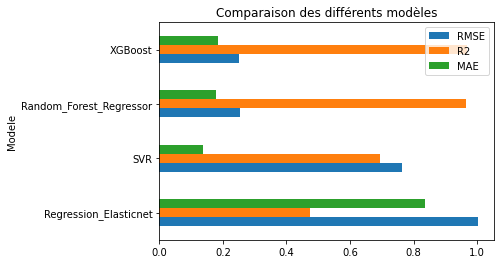

In [ ]:
results_co2.plot.barh()
plt.title('Comparaison des différents modèles')

In [ ]:
### ON GARDE L'INDICATEUR RMSE COMME INDICATEUR DE QUALITE

In [ ]:
list_model_co2 = [elastic_grid_co2,svm_co2,rfr_emissions,xgb_grid_emissions]

In [ ]:
import timeit
results_co2_time=pd.DataFrame()
time_mod=[]

for mod in list_model_co2:

  start_time = timeit.default_timer()
  pred = mod.predict(X_co2_train)
  elapsed = timeit.default_timer() - start_time
  time_mod.append(elapsed)

results_co2_time['RMSE']=results_co2['RMSE'].copy()
results_co2_time['time']=time_mod
results_co2_time

,RMSE,time
Modele,,
Regression_Elasticnet,1.003489,0.003151
SVR,0.764453,1.011646
Random_Forest_Regressor,0.253375,0.111020
XGBoost,0.249239,0.217643


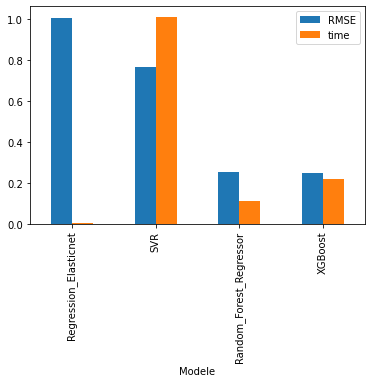

In [ ]:
results_co2_time.plot.bar()

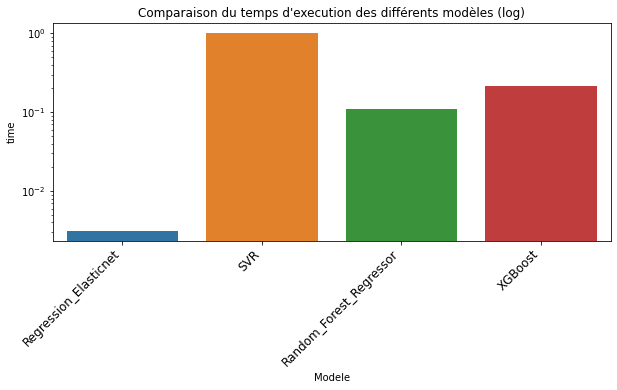

In [ ]:
plt.figure(figsize=(10,4))
plt.title('Comparaison du temps d\'execution des différents modèles (log)')
chart = sns.barplot(x = results_co2_time.index,
           y = results_co2_time['time'])
chart.set_xticklabels(labels = results_co2_time.index, 
                      rotation=45,
                     horizontalalignment='right',
                     size=12,
                     )
ax = plt.gca()
ax.set_yscale('log')
#ax.set_ylim([0, 3])
plt.show()

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)


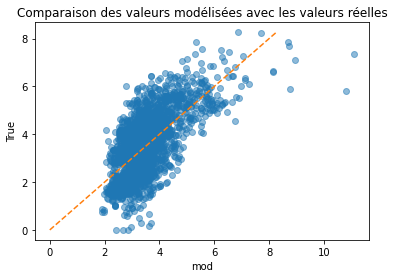


---------------------------------------------
GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'epsilon': array([0.001, 0.01 , 0.1  , 1.   ]),
                         'gamma': array([0.01, 0.1 , 1.  ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)


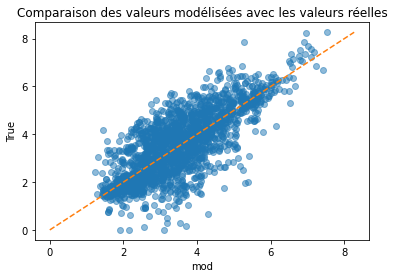


---------------------------------------------
GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_st

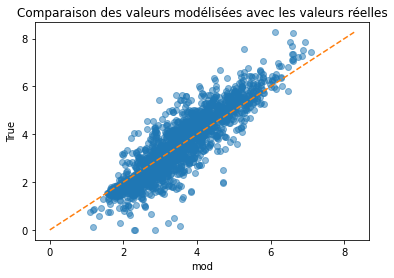


---------------------------------------------
GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=-1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.03, 0.05, 0.07, 0.1],
                 

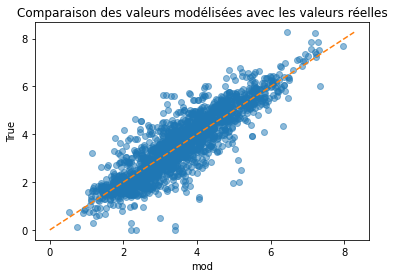


---------------------------------------------


In [ ]:
for mod in list_model_co2:
  print(mod)
  plot_tru_mod(mod,X_co2_test,y_co2_test)
  print('')
  print('-'*45)

# Importance de l'ENERGYSTAR SCORE

## CAS CONSOMMATION NRJ

In [ ]:
###nouveau modèle de Rain forest basé sur les hyper paramètres optimisés 

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

rfr_best = RandomForestRegressor(max_depth= 50, max_features= 'sqrt', min_samples_leaf= 1)

rfr_best.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
pickle.dump(rfr_best, open('P4_rfr_best_NRJ.pickle', 'wb'))

In [ ]:
results_best = pd.DataFrame()
results_best = results_best.append(pd.DataFrame({'Modele' : ['RFR_Best'],'RMSE' : [math.sqrt(sklearn.metrics.mean_squared_error(y_train,rfr_best.predict(X_train)))],
                                       'R2' : [sklearn.metrics.r2_score(y_train,rfr_best.predict(X_train))] ,
                                       'MAE' : [sklearn.metrics.mean_absolute_error(y_train,rfr_best.predict(X_train))]}),ignore_index=True)

In [ ]:
results_best

,Modele,RMSE,R2,MAE
0,RFR_Best,0.441949,0.922598,0.145248


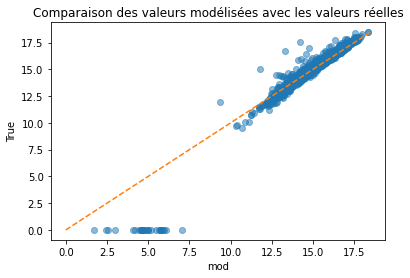

In [ ]:
plot_tru_mod(rfr_best,X_train,y_train)

###Recherche de l'importance des features

In [ ]:
select = SelectFromModel(rfr_best, prefit=True, threshold=0.003) #seuil d'importance avec threshold
fram_selected = select.transform(X_train)

print('nb de features gardés :', fram_selected.shape[1])

nb de features gardés : 36


In [ ]:
def importance_feat(mod,frame_colon,nb_feat):
#mod = modèle à tester
#frame_colon = data set ou extraire le nom des features
#nb_feat = nb de feature à afficher

  imp_feat=mod.feature_importances_

  frame_imp_feat=pd.DataFrame()
  frame_imp_feat['feature']=frame_colon.columns
  frame_imp_feat['Importance']=imp_feat
  frame_imp_feat=frame_imp_feat.set_index('feature',drop=True)
  frame_imp_feat=frame_imp_feat.sort_values(by='Importance', ascending = False)
  frame_imp_feat.head(nb_feat).plot.barh()
  plt.title('Importance des features')
  plt.show()

  print('importance de l\'ENERGYSTARScore' , frame_imp_feat.loc['ENERGYSTARScore'])

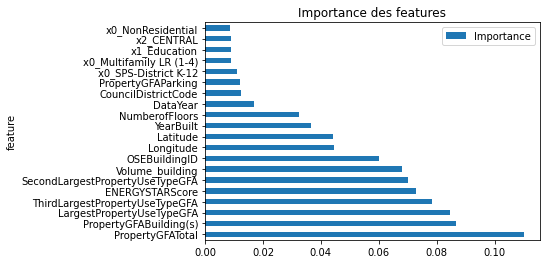

importance de l'ENERGYSTARScore Importance    0.072756
Name: ENERGYSTARScore, dtype: float64


In [ ]:
importance_feat(rfr_best,X,20)

Optimal nb features : 62


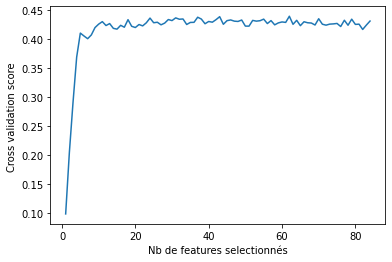

In [ ]:
### En cross validation :

from sklearn.feature_selection import RFECV

rfecv = RFECV(rfr_best)
rfecv.fit(X_train, y_train)

print("Optimal nb features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Nb de features selectionnés")
plt.ylabel("Cross validation score ")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

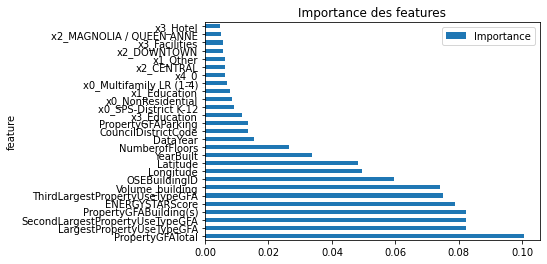

importance de l'ENERGYSTARScore Importance    0.078826
Name: ENERGYSTARScore, dtype: float64


,Importance
feature,
PropertyGFATotal,0.100566
LargestPropertyUseTypeGFA,0.082358
SecondLargestPropertyUseTypeGFA,0.082329
PropertyGFABuilding(s),0.082192
ENERGYSTARScore,0.078826
...,...
x2_DELRIDGE,0.000847
x4_Shop,0.000789
x5_Activity,0.000766


In [ ]:
# Liste des features selectionnés
indice_col_selc = rfecv.get_support(indices=True)
col_X = X_train.columns
col_sec=[]

for i in indice_col_selc:
  col_sec.append(col_X[i])

#coef des features selectionnés
imp_feat=rfecv.estimator_.feature_importances_ 

#barplot
frame_imp_feat=pd.DataFrame()
frame_imp_feat['feature']=col_sec
frame_imp_feat['Importance']=imp_feat
frame_imp_feat=frame_imp_feat.set_index('feature',drop=True)
frame_imp_feat=frame_imp_feat.sort_values(by='Importance', ascending = False)
frame_imp_feat.head(27).plot.barh()
plt.title('Importance des features')
plt.show()

print('importance de l\'ENERGYSTARScore' , frame_imp_feat.loc['ENERGYSTARScore'])

frame_imp_feat

In [ ]:
results_best = results_best.append(pd.DataFrame({'Modele' : ['RFECV'],'RMSE' : [math.sqrt(sklearn.metrics.mean_squared_error(y_train,rfecv.predict(X_train)))],
                                       'R2' : [sklearn.metrics.r2_score(y_train,rfecv.predict(X_train))] ,
                                       'MAE' : [sklearn.metrics.mean_absolute_error(y_train,rfecv.predict(X_train))]}),ignore_index=True)

In [ ]:
results_best

,Modele,RMSE,R2,MAE
0,RFR_Best,0.441949,0.922598,0.145248
1,RFECV,0.452519,0.918852,0.145071


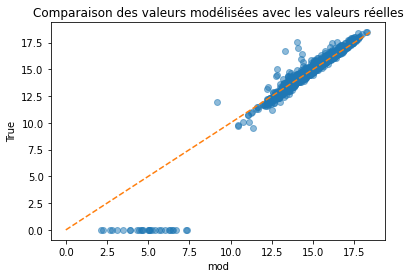

In [ ]:
plot_tru_mod(rfecv,X_train,y_train)

### Prédiction sur le test set

In [ ]:
results_best = results_best.append(pd.DataFrame({'Modele' : ['RFR_test'],'RMSE' : [math.sqrt(sklearn.metrics.mean_squared_error(y_test,rfr_best.predict(X_test)))],
                                       'R2' : [sklearn.metrics.r2_score(y_test,rfr_best.predict(X_test))] ,
                                       'MAE' : [sklearn.metrics.mean_absolute_error(y_test,rfr_best.predict(X_test))]}),ignore_index=True)

In [ ]:
results_best

,Modele,RMSE,R2,MAE
0,RFR_Best,0.441949,0.922598,0.145248
1,RFECV,0.452519,0.918852,0.145071
2,RFR_test,1.105352,0.387397,0.357949


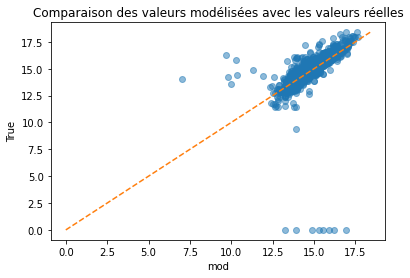

In [ ]:
plot_tru_mod(rfr_best,X_test,y_test)

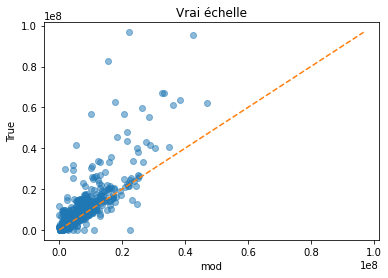

In [ ]:
# Inverse du log
plt.plot(np.expm1(rfr_best.predict(X_test)),np.expm1(y_test),'o',alpha=0.5)
min_tru=np.expm1(y_test).min()
max_tru=np.expm1(y_test).max()
plt.plot([min_tru, max_tru], [min_tru, max_tru], '--') 
plt.title('Vrai échelle')
plt.xlabel("mod")
plt.ylabel("True")
#plt.xlim([0, 0.6E8])
plt.show()

### Sans l'ENERGYSTAR SCORE

In [ ]:
X_train_NoSCOR = X_train.copy()
X_train_NoSCOR.drop('ENERGYSTARScore', axis=1, inplace=True)
X_test_NoSCOR = X_test.copy()
X_test_NoSCOR.drop('ENERGYSTARScore', axis=1, inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

n_featur = X_train_NoSCOR.shape[1]

param = {
    #'n_estimators' : [10,50,100,300], #nombre d'arbres de décision
    'max_depth' : [10,20,50], #profondeur de l'arbre
    'min_samples_leaf' : [1,3,5], #nombre de feuilles minimales dans un noeud
    'max_features': [n_featur, 'sqrt'] #nombre de features observées pour chaque arbre
    }

rfr_search_NoSCOR = GridSearchCV(RandomForestRegressor(),
                               param_grid = param,
                               scoring='neg_mean_squared_error',
                               verbose=2,
                               cv=5)

rfr_search_NoSCOR.fit(X_train_NoSCOR, y_train)
print('-'*45)
print(rfr_search_NoSCOR.best_params_)
print(rfr_search_NoSCOR.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=10, max_features=83, min_samples_leaf=1 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, max_features=83, min_samples_leaf=1, total=   3.5s
[CV] max_depth=10, max_features=83, min_samples_leaf=1 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV]  max_depth=10, max_features=83, min_samples_leaf=1, total=   3.5s
[CV] max_depth=10, max_features=83, min_samples_leaf=1 ...............
[CV]  max_depth=10, max_features=83, min_samples_leaf=1, total=   3.4s
[CV] max_depth=10, max_features=83, min_samples_leaf=1 ...............
[CV]  max_depth=10, max_features=83, min_samples_leaf=1, total=   3.5s
[CV] max_depth=10, max_features=83, min_samples_leaf=1 ...............
[CV]  max_depth=10, max_features=83, min_samples_leaf=1, total=   3.5s
[CV] max_depth=10, max_features=83, min_samples_leaf=3 ...............
[CV]  max_depth=10, max_features=83, min_samples_leaf=3, total=   3.4s
[CV] max_depth=10, max_features=83, min_samples_leaf=3 ...............
[CV]  max_depth=10, max_features=83, min_samples_leaf=3, total=   3.4s
[CV] max_depth=10, max_features=83, min_samples_leaf=3 ...............
[CV]  max_depth=10, max_features=83, min_samples_leaf=3, total=   3.4s
[CV] max_depth=10, max_features=83, min_samples_leaf=3 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  3.9min finished


---------------------------------------------
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1}
-1.5311677775503925


In [ ]:
rfr_best_NoSCOR = RandomForestRegressor(max_depth= 50, max_features= 'sqrt', min_samples_leaf= 1)

rfr_best_NoSCOR.fit(X_train_NoSCOR, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
results_best= results_best.append(pd.DataFrame({'Modele' : ['RFR_Best_NoSCOR'],'RMSE' : [math.sqrt(sklearn.metrics.mean_squared_error(y_train,rfr_best_NoSCOR.predict(X_train_NoSCOR)))],
                                       'R2' : [sklearn.metrics.r2_score(y_train,rfr_best_NoSCOR.predict(X_train_NoSCOR))] ,
                                       'MAE' : [sklearn.metrics.mean_absolute_error(y_train,rfr_best_NoSCOR.predict(X_train_NoSCOR))]}),ignore_index=True)
results_best

,Modele,RMSE,R2,MAE
0,RFR_Best,0.441949,0.922598,0.145248
1,RFECV,0.452519,0.918852,0.145071
2,RFR_test,1.105352,0.387397,0.357949
3,RFR_Best_NoSCOR,0.461430,0.915624,0.159382


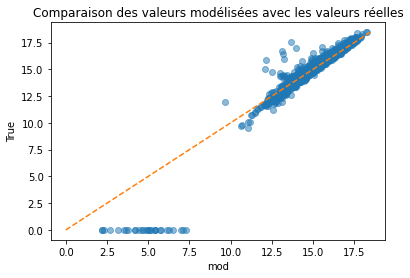

In [ ]:
plot_tru_mod(rfr_best_NoSCOR,X_train_NoSCOR,y_train)

In [ ]:
results_best = results_best.append(pd.DataFrame({'Modele' : ['RFR_test_NoSCOR'],'RMSE' : [math.sqrt(sklearn.metrics.mean_squared_error(y_test,rfr_best_NoSCOR.predict(X_test_NoSCOR)))],
                                       'R2' : [sklearn.metrics.r2_score(y_test,rfr_best_NoSCOR.predict(X_test_NoSCOR))] ,
                                       'MAE' : [sklearn.metrics.mean_absolute_error(y_test,rfr_best_NoSCOR.predict(X_test_NoSCOR))]}),ignore_index=True)
results_best

,Modele,RMSE,R2,MAE
0,RFR_Best,0.441949,0.922598,0.145248
1,RFECV,0.452519,0.918852,0.145071
2,RFR_test,1.105352,0.387397,0.357949
3,RFR_Best_NoSCOR,0.461430,0.915624,0.159382
4,RFR_test_NoSCOR,1.128725,0.361215,0.385764


In [ ]:
results_best

In [ ]:
NRJ_noScore = pd.DataFrame()
NRJ_noScore ['Avec EnergyStar Score'] = results_best.loc[2,:]
NRJ_noScore ['Sans EnergyStar Score'] = results_best.loc[4,:]
NRJ_noScore=NRJ_noScore.drop('Modele')
NRJ_noScore

,Avec EnergyStar Score,Sans EnergyStar Score
RMSE,1.10535,1.12873
R2,0.387397,0.361215
MAE,0.357949,0.385764


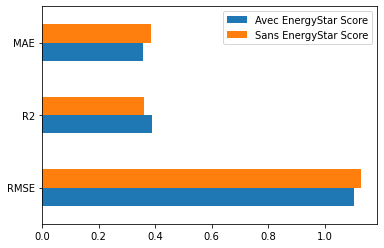

In [ ]:
NRJ_noScore.plot.barh()

In [ ]:
### L'energystar score permet de gagner légérement en précision sur le set de test. 
## Les coûts engagés pour obtenir un tel indicateur ne vaut pas vraiment la précision gagné sur le modèle

## CAS CO2

In [ ]:
###nouveau modèle de Rain forest basé sur les hyper paramètres optimisés 

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

rfr_best_co2 = RandomForestRegressor(max_depth= 20, max_features= 'sqrt', min_samples_leaf= 1)

rfr_best_co2.fit(X_co2_train, y_co2_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
pickle.dump(rfr_best_co2, open('P4_rfr_best_CO2.pickle', 'wb'))

In [ ]:
results_best_co2 = pd.DataFrame()
results_best_co2 = results_best_co2.append(pd.DataFrame({'Modele' : ['RFR_Best'],'RMSE' : [math.sqrt(sklearn.metrics.mean_squared_error(y_co2_train,rfr_best_co2.predict(X_co2_train)))],
                                       'R2' : [sklearn.metrics.r2_score(y_co2_train,rfr_best_co2.predict(X_co2_train))] ,
                                       'MAE' : [sklearn.metrics.mean_absolute_error(y_co2_train,rfr_best_co2.predict(X_co2_train))]}),ignore_index=True)

In [ ]:
results_best_co2

,Modele,RMSE,R2,MAE
0,RFR_Best,0.253025,0.966633,0.183892


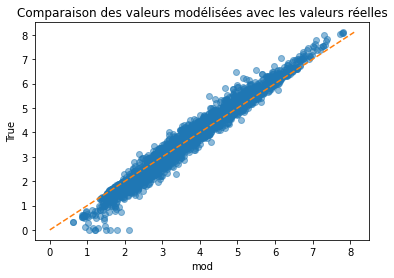

In [ ]:
plot_tru_mod(rfr_best_co2,X_co2_train,y_co2_train)

###Recherche de l'importance des features

In [ ]:
select = SelectFromModel(rfr_best_co2, prefit=True, threshold=0.003) #seuil d'importance avec threshold
fram_selected = select.transform(X_co2_train)

print('nb de features gardés :', fram_selected.shape[1])

nb de features gardés : 20


In [ ]:
def importance_feat(mod,frame_colon,nb_feat):
#mod = modèle à tester
#frame_colon = data set ou extraire le nom des features
#nb_feat = nb de feature à afficher

  imp_feat=mod.feature_importances_

  frame_imp_feat=pd.DataFrame()
  frame_imp_feat['feature']=frame_colon.columns
  frame_imp_feat['Importance']=imp_feat
  frame_imp_feat=frame_imp_feat.set_index('feature',drop=True)
  frame_imp_feat=frame_imp_feat.sort_values(by='Importance', ascending = False)
  frame_imp_feat.head(nb_feat).plot.barh()
  plt.title('Importance des features')
  plt.show()

  print('importance de l\'ENERGYSTARScore' , frame_imp_feat.loc['ENERGYSTARScore'])

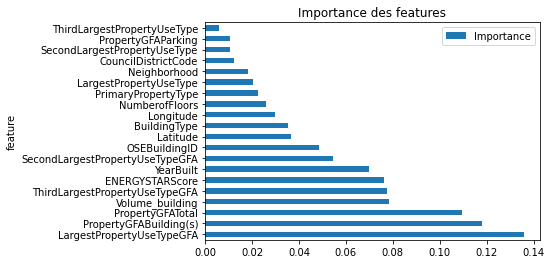

importance de l'ENERGYSTARScore Importance    0.076122
Name: ENERGYSTARScore, dtype: float64


In [ ]:
importance_feat(rfr_best_co2,X_co2_train,20)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal nb features : 18


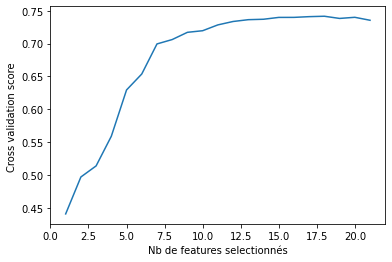

In [ ]:
### En cross validation :

from sklearn.feature_selection import RFECV

rfecv_co2 = RFECV(rfr_best_co2)
rfecv_co2.fit(X_co2_train, y_co2_train)

print("Optimal nb features : %d" % rfecv_co2.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Nb de features selectionnés")
plt.ylabel("Cross validation score ")
plt.plot(range(1, len(rfecv_co2.grid_scores_) + 1), rfecv_co2.grid_scores_)
plt.show()

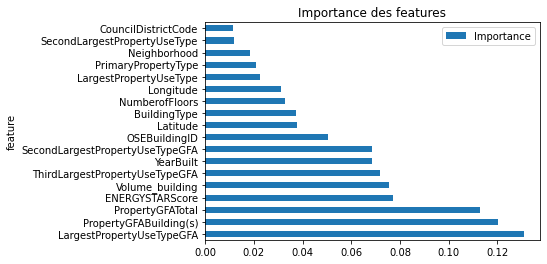

importance de l'ENERGYSTARScore Importance    0.077179
Name: ENERGYSTARScore, dtype: float64


,Importance
feature,
LargestPropertyUseTypeGFA,0.130904
PropertyGFABuilding(s),0.120203
PropertyGFATotal,0.112977
ENERGYSTARScore,0.077179
Volume_building,0.075655
ThirdLargestPropertyUseTypeGFA,0.071679
YearBuilt,0.068535
SecondLargestPropertyUseTypeGFA,0.068346
OSEBuildingID,0.050316


In [ ]:
# Liste des features selectionnés
indice_col_selc_co2 = rfecv_co2.get_support(indices=True)
col_X_co2 = X_co2_train.columns
col_sec_co2=[]

for i in indice_col_selc_co2:
  col_sec_co2.append(col_X_co2[i])

#coef des features selectionnés
imp_feat_co2=rfecv_co2.estimator_.feature_importances_ 

#barplot
frame_imp_feat_co2=pd.DataFrame()
frame_imp_feat_co2['feature']=col_sec_co2
frame_imp_feat_co2['Importance']=imp_feat_co2
frame_imp_feat_co2=frame_imp_feat_co2.set_index('feature',drop=True)
frame_imp_feat_co2=frame_imp_feat_co2.sort_values(by='Importance', ascending = False)
frame_imp_feat_co2.head(20).plot.barh()
plt.title('Importance des features')
plt.show()

print('importance de l\'ENERGYSTARScore' , frame_imp_feat_co2.loc['ENERGYSTARScore'])

frame_imp_feat_co2

In [ ]:
results_best_co2 = results_best_co2.append(pd.DataFrame({'Modele' : ['RFECV'],'RMSE' : [math.sqrt(sklearn.metrics.mean_squared_error(y_co2_train,rfecv_co2.predict(X_co2_train)))],
                                       'R2' : [sklearn.metrics.r2_score(y_co2_train,rfecv_co2.predict(X_co2_train))] ,
                                       'MAE' : [sklearn.metrics.mean_absolute_error(y_co2_train,rfecv_co2.predict(X_co2_train))]}),ignore_index=True)

In [ ]:
results_best_co2

,Modele,RMSE,R2,MAE
0,RFR_Best,0.253025,0.966633,0.183892
1,RFECV,0.251101,0.967139,0.181585


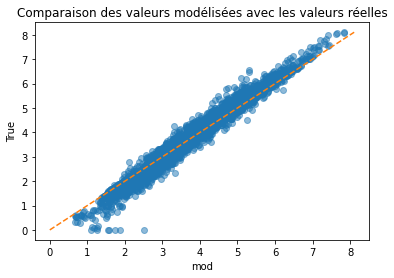

In [ ]:
plot_tru_mod(rfecv_co2,X_co2_train,y_co2_train)

### Prédiction sur le test set

In [ ]:
results_best_co2 = results_best_co2.append(pd.DataFrame({'Modele' : ['RFR_test'],'RMSE' : [math.sqrt(sklearn.metrics.mean_squared_error(y_co2_test,rfr_best_co2.predict(X_co2_test)))],
                                       'R2' : [sklearn.metrics.r2_score(y_co2_test,rfr_best_co2.predict(X_co2_test))] ,
                                       'MAE' : [sklearn.metrics.mean_absolute_error(y_co2_test,rfr_best_co2.predict(X_co2_test))]}),ignore_index=True)

In [ ]:
results_best_co2

,Modele,RMSE,R2,MAE
0,RFR_Best,0.253025,0.966633,0.183892
1,RFECV,0.251101,0.967139,0.181585
2,RFR_test,0.646289,0.785010,0.484340


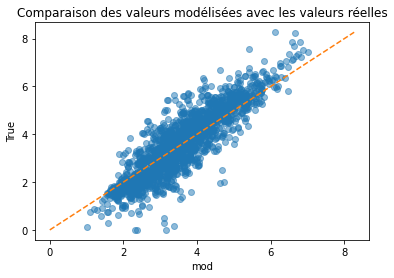

In [ ]:
plot_tru_mod(rfr_best_co2,X_co2_test,y_co2_test)

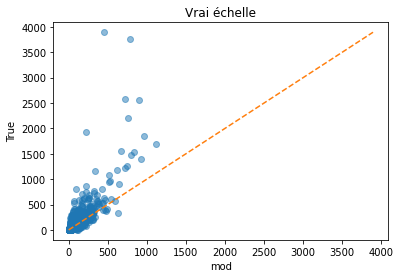

In [ ]:
# Inverse du log
plt.plot(np.expm1(rfr_best_co2.predict(X_co2_test)),np.expm1(y_co2_test),'o',alpha=0.5)
min_tru=np.expm1(y_co2_test).min()
max_tru=np.expm1(y_co2_test).max()
plt.plot([min_tru, max_tru], [min_tru, max_tru], '--') 
plt.title('Vrai échelle')
plt.xlabel("mod")
plt.ylabel("True")
plt.show()

### Sans l'ENERGYSTAR SCORE

In [ ]:
X_train_NoSCOR_co2 = X_co2_train.copy()
X_train_NoSCOR_co2.drop('ENERGYSTARScore', axis=1, inplace=True)
X_test_NoSCOR_co2 = X_co2_test.copy()
X_test_NoSCOR_co2.drop('ENERGYSTARScore', axis=1, inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

n_featur = X_train_NoSCOR_co2.shape[1]

param = {
    #'n_estimators' : [10,50,100,300], #nombre d'arbres de décision
    'max_depth' : [10,20,50], #profondeur de l'arbre
    'min_samples_leaf' : [1,3,5], #nombre de feuilles minimales dans un noeud
    'max_features': [n_featur, 'sqrt'] #nombre de features observées pour chaque arbre
    }

rfr_search_NoSCOR_co2 = GridSearchCV(RandomForestRegressor(),
                               param_grid = param,
                               scoring='neg_mean_squared_error',
                               verbose=2,
                               cv=5)

rfr_search_NoSCOR_co2.fit(X_train_NoSCOR_co2, y_co2_train)
print('-'*45)
print(rfr_search_NoSCOR_co2.best_params_)
print(rfr_search_NoSCOR_co2.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=10, max_features=20, min_samples_leaf=1 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=20, min_samples_leaf=1, total=   2.8s
[CV] max_depth=10, max_features=20, min_samples_leaf=1 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=20, min_samples_leaf=1, total=   2.8s
[CV] max_depth=10, max_features=20, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=20, min_samples_leaf=1, total=   2.8s
[CV] max_depth=10, max_features=20, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=20, min_samples_leaf=1, total=   2.8s
[CV] max_depth=10, max_features=20, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=20, min_samples_leaf=1, total=   2.7s
[CV] max_depth=10, max_features=20, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=20, min_samples_leaf=3, total=   2.7s
[CV] max_depth=10, max_features=20, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=20, min_samples_leaf=3, total=   2.6s
[CV] max_depth=10, max_features=20, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=20, min_samples_leaf=3, total=   2.6s
[CV] max_depth=10, max_features=20, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=20, min_samples_leaf=3, total=   2.6s
[CV] max_depth=10, max_features=20, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=20, min_samples_leaf=3, total=   2.6s
[CV] max_depth=10, max_features=20, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=20, min_samples_leaf=5, total=   2.6s
[CV] max_depth=10, max_features=20, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=20, min_samples_leaf=5, total=   3.0s
[CV] max_depth=10, max_features=20, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=20, min_samples_leaf=5, total=   3.1s
[CV] max_depth=10, max_features=20, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=20, min_samples_leaf=5, total=   2.9s
[CV] max_depth=10, max_features=20, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=20, min_samples_leaf=5, total=   2.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=3, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   0.7s
[CV] max_depth=20, max_features=20, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=20, min_samples_leaf=1, total=   4.0s
[CV] max_depth=20, max_features=20, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=20, min_samples_leaf=1, total=   3.9s
[CV] max_depth=20, max_features=20, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=20, min_samples_leaf=1, total=   3.9s
[CV] max_depth=20, max_features=20, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=20, min_samples_leaf=1, total=   3.9s
[CV] max_depth=20, max_features=20, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=20, min_samples_leaf=1, total=   3.9s
[CV] max_depth=20, max_features=20, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=20, min_samples_leaf=3, total=   3.2s
[CV] max_depth=20, max_features=20, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=20, min_samples_leaf=3, total=   3.2s
[CV] max_depth=20, max_features=20, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=20, min_samples_leaf=3, total=   3.2s
[CV] max_depth=20, max_features=20, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=20, min_samples_leaf=3, total=   3.5s
[CV] max_depth=20, max_features=20, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=20, min_samples_leaf=3, total=   3.6s
[CV] max_depth=20, max_features=20, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=20, min_samples_leaf=5, total=   3.2s
[CV] max_depth=20, max_features=20, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=20, min_samples_leaf=5, total=   3.3s
[CV] max_depth=20, max_features=20, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=20, min_samples_leaf=5, total=   3.3s
[CV] max_depth=20, max_features=20, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=20, min_samples_leaf=5, total=   3.2s
[CV] max_depth=20, max_features=20, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=20, min_samples_leaf=5, total=   3.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, total=   1.2s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=50, max_features=20, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=20, min_samples_leaf=1, total=   4.0s
[CV] max_depth=50, max_features=20, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=20, min_samples_leaf=1, total=   4.0s
[CV] max_depth=50, max_features=20, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=20, min_samples_leaf=1, total=   4.0s
[CV] max_depth=50, max_features=20, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=20, min_samples_leaf=1, total=   4.0s
[CV] max_depth=50, max_features=20, min_samples_leaf=1 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=20, min_samples_leaf=1, total=   4.1s
[CV] max_depth=50, max_features=20, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=20, min_samples_leaf=3, total=   3.2s
[CV] max_depth=50, max_features=20, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=20, min_samples_leaf=3, total=   3.2s
[CV] max_depth=50, max_features=20, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=20, min_samples_leaf=3, total=   3.2s
[CV] max_depth=50, max_features=20, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=20, min_samples_leaf=3, total=   3.2s
[CV] max_depth=50, max_features=20, min_samples_leaf=3 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=20, min_samples_leaf=3, total=   3.2s
[CV] max_depth=50, max_features=20, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=20, min_samples_leaf=5, total=   2.9s
[CV] max_depth=50, max_features=20, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=20, min_samples_leaf=5, total=   2.9s
[CV] max_depth=50, max_features=20, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=20, min_samples_leaf=5, total=   2.9s
[CV] max_depth=50, max_features=20, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=20, min_samples_leaf=5, total=   2.9s
[CV] max_depth=50, max_features=20, min_samples_leaf=5 ...............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=20, min_samples_leaf=5, total=   2.9s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=1 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=1, total=   1.1s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=3 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=3, total=   0.9s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=5, total=   0.8s
[CV] max_depth=50, max_features=sqrt, min_samples_leaf=5 .............


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=50, max_features=sqrt, min_samples_leaf=5, total=   0.8s


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  3.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


---------------------------------------------
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1}
-0.5391618795355453


In [ ]:
rfr_best_NoSCOR_co2 = RandomForestRegressor(max_depth= 50, max_features= 'sqrt', min_samples_leaf= 1)

rfr_best_NoSCOR_co2.fit(X_train_NoSCOR_co2, y_co2_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
results_best_co2= results_best_co2.append(pd.DataFrame({'Modele' : ['RFR_Best_NoSCOR'],'RMSE' : [math.sqrt(sklearn.metrics.mean_squared_error(y_co2_train,rfr_best_NoSCOR_co2.predict(X_train_NoSCOR_co2)))],
                                       'R2' : [sklearn.metrics.r2_score(y_co2_train,rfr_best_NoSCOR_co2.predict(X_train_NoSCOR_co2))] ,
                                       'MAE' : [sklearn.metrics.mean_absolute_error(y_co2_train,rfr_best_NoSCOR_co2.predict(X_train_NoSCOR_co2))]}),ignore_index=True)
results_best_co2

,Modele,RMSE,R2,MAE
0,RFR_Best,0.253025,0.966633,0.183892
1,RFECV,0.251101,0.967139,0.181585
2,RFR_test,0.646289,0.785010,0.484340
3,RFR_Best_NoSCOR,0.255453,0.965990,0.179877


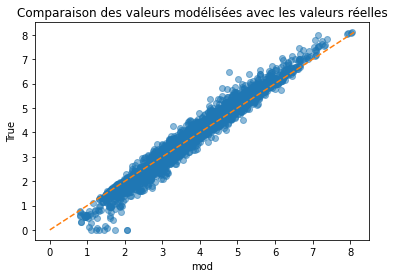

In [ ]:
plot_tru_mod(rfr_best_NoSCOR_co2,X_train_NoSCOR_co2,y_co2_train)

In [ ]:
results_best_co2 = results_best_co2.append(pd.DataFrame({'Modele' : ['RFR_test_NoSCOR'],'RMSE' : [math.sqrt(sklearn.metrics.mean_squared_error(y_co2_test,rfr_best_NoSCOR_co2.predict(X_test_NoSCOR_co2)))],
                                       'R2' : [sklearn.metrics.r2_score(y_co2_test,rfr_best_NoSCOR_co2.predict(X_test_NoSCOR_co2))] ,
                                       'MAE' : [sklearn.metrics.mean_absolute_error(y_co2_test,rfr_best_NoSCOR_co2.predict(X_test_NoSCOR_co2))]}),ignore_index=True)
results_best_co2

,Modele,RMSE,R2,MAE
0,RFR_Best,0.253025,0.966633,0.183892
1,RFECV,0.251101,0.967139,0.181585
2,RFR_test,0.646289,0.785010,0.484340
3,RFR_Best_NoSCOR,0.255453,0.965990,0.179877
4,RFR_test_NoSCOR,0.670827,0.768375,0.484492


In [ ]:
CO2_noScore = pd.DataFrame()
CO2_noScore ['Avec EnergyStar Score'] = results_best_co2.loc[2,:]
CO2_noScore ['Sans EnergyStar Score'] = results_best_co2.loc[4,:]
CO2_noScore=CO2_noScore.drop('Modele')
CO2_noScore

,Avec EnergyStar Score,Sans EnergyStar Score
RMSE,0.646289,0.670827
R2,0.78501,0.768375
MAE,0.48434,0.484492


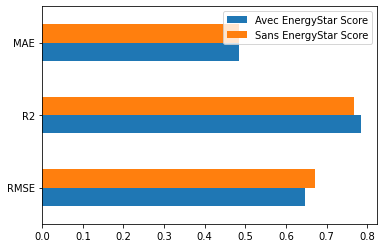

In [ ]:
CO2_noScore.plot.barh()

In [ ]:
### même conclusion que pour la consommation NRJ